In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import random
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage


In [2]:
# Cleaning Data

In [3]:
# Pre-processing
OpenFile = pd.read_csv('diabetes.csv')
FirstTen = OpenFile.head(10)
print(FirstTen)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [4]:
# Display Information of our Data
CheckData = OpenFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Check empty cells
CheckNull = OpenFile.isnull().sum()
print(CheckNull)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# Check Duplicates
ShowDuplicates = OpenFile.duplicated().sum()
print(ShowDuplicates)

0


In [7]:
OpenFile.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


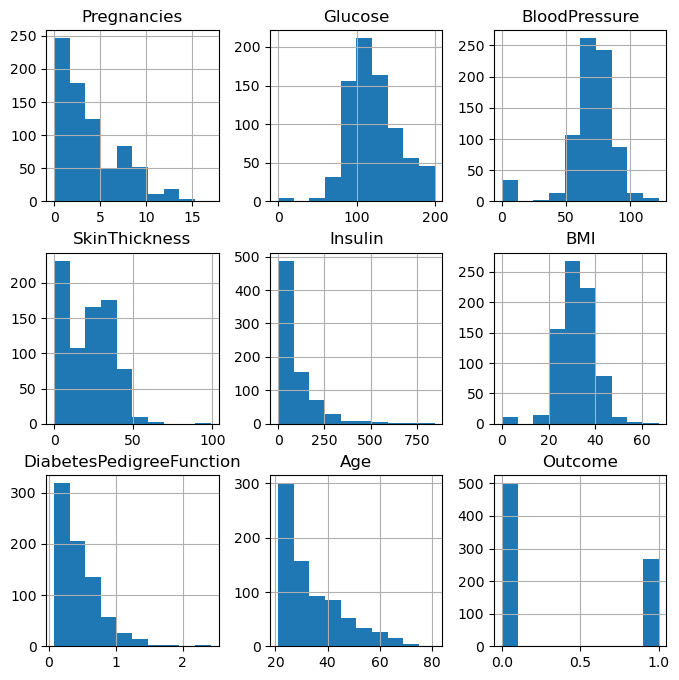

In [8]:
#histogram
OpenFile.hist(bins=10,figsize=(8,8))
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

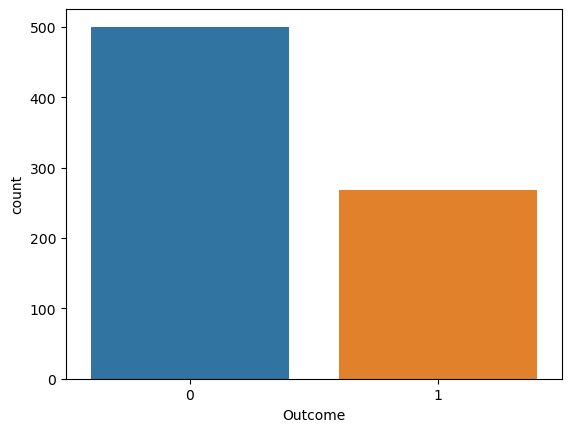

In [9]:
import seaborn as sns
# count patient with diabtes and with no diabetes
sns.countplot(x ='Outcome',data = OpenFile)

In [10]:
Pregnancies = OpenFile.iloc[:, :1].values
Glucose = OpenFile.iloc[:, 1:2].values
BloodPressure = OpenFile.iloc[:, 2:3].values
SkinThickness = OpenFile.iloc[:, 3:4].values
Insulin = OpenFile.iloc[:, 4:5].values
BMI = OpenFile.iloc[:, 5:6].values
DiabetesPedigreeFunction = OpenFile.iloc[:, 6:7].values
Age = OpenFile.iloc[:, 7:8].values
Outcome = OpenFile.iloc[:, -1:].values

C:\Users\o3006\AppData\Local\Temp\ipykernel_9440\3377872274.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(151)
C:\Users\o3006\AppData\Local\Temp\ipykernel_9440\3377872274.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(153)


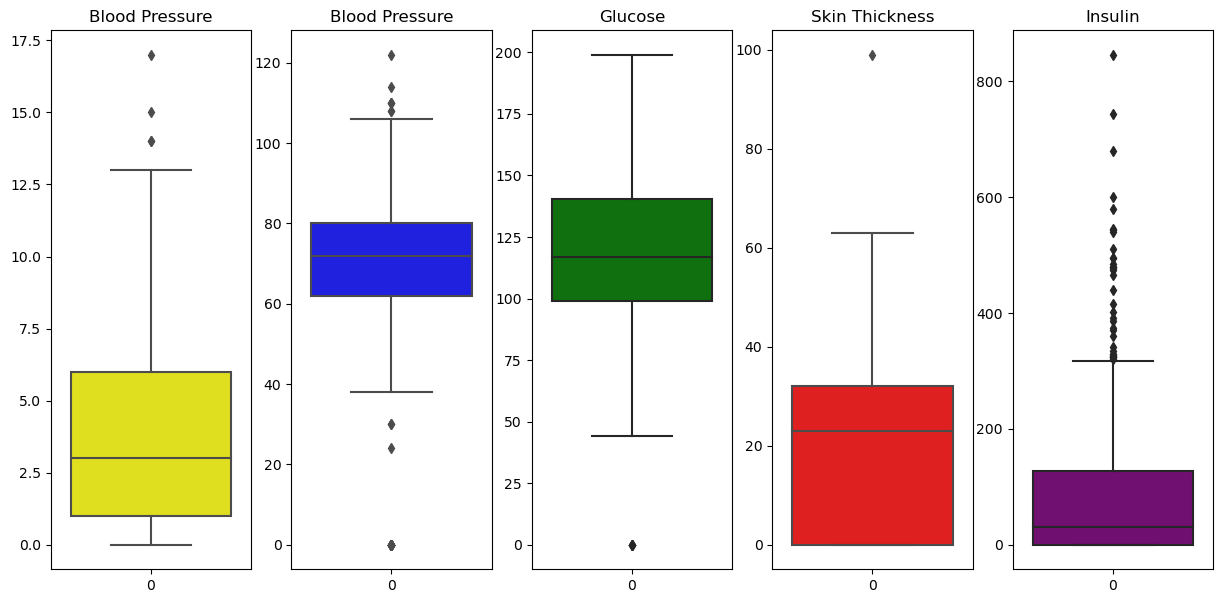

In [11]:
# Check Outliers in Group A
plt.subplots(2,2,figsize=(15,7))
plt.subplot(151)
sns.boxplot(Pregnancies, color="yellow").set_title("Blood Pressure")
plt.subplot(152)
sns.boxplot(BloodPressure, color="blue").set_title("Blood Pressure")
plt.subplot(153)
sns.boxplot(Glucose, color="green").set_title("Glucose")
plt.subplot(154)
sns.boxplot(SkinThickness, color="red").set_title("Skin Thickness")
plt.subplot(155)
sns.boxplot(Insulin, color="purple").set_title("Insulin")

plt.show()

C:\Users\o3006\AppData\Local\Temp\ipykernel_9440\1199493736.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


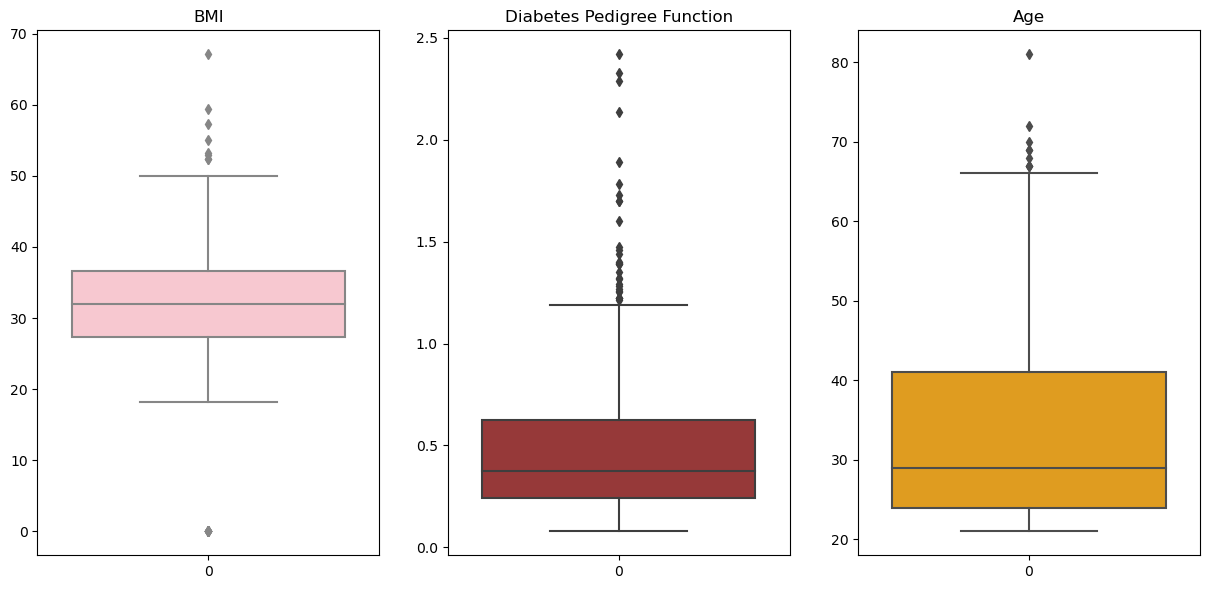

In [12]:
# Check Outliers in Group B
plt.subplots(1,1,figsize=(15,15))

plt.subplot(231)
sns.boxplot(BMI, color="pink").set_title("BMI")
plt.subplot(232)
sns.boxplot(DiabetesPedigreeFunction, color="brown").set_title("Diabetes Pedigree Function")
plt.subplot(233)
sns.boxplot(Age, color="orange").set_title("Age")
plt.show()

In [13]:
# Genetic Algorithm

In [14]:
# Function to read CSV file
def read_data(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y


In [15]:
def read_data_Target(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y

In [16]:
# Function to generate initial population
def initialize_population(population_size, max_depth):
    population = []
    for _ in range(population_size):
        tree = DecisionTreeClassifier(max_depth=max_depth)
        population.append(tree)
    return population


In [17]:
# Fitness function and evaluation
def evaluate_fitness(tree, X_train, y_train, X_test, y_test):
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    confusion = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)
    return accuracy, precision, recall, confusion, report


In [18]:
# Tournament selection
def tournamentSelection(population, fitness_scores, tournament_size):
    selected = []
    for _ in range(len(population)):
        participants = random.sample(range(len(population)), min(tournament_size, len(population)))
        winner = max(participants, key=lambda x: fitness_scores[x])
        selected.append(population[winner])
    return selected


In [19]:
# Crossover
def crossover(parent1, parent2):
    tree1 = parent1.tree_
    tree2 = parent2.tree_
    nodes1 = np.random.randint(0, tree1.node_count)
    nodes2 = np.random.randint(0, tree2.node_count)
    child1 = DecisionTreeClassifier(max_depth=parent1.max_depth)
    child2 = DecisionTreeClassifier(max_depth=parent2.max_depth)
    child1.tree_ = CrossoverSubtrees(tree1, nodes1, tree2, nodes2)
    child2.tree_ = CrossoverSubtrees(tree2, nodes2, tree1, nodes1)
    return child1, child2, nodes1, nodes2


In [20]:
def CrossoverSubtrees(tree1, node1, tree2, node2):
    temp = tree1.children_left[node1]
    tree1.children_left[node1] = tree2.children_left[node2]
    tree2.children_left[node2] = temp
    temp = tree1.children_right[node1]
    tree1.children_right[node1] = tree2.children_right[node2]
    tree2.children_right[node2] = temp
    return tree1


In [21]:
# Mutation
def mutation(tree, mutation_rate):
    if random.uniform(0, 1) < mutation_rate:
        node_to_mutate = np.random.randint(0, tree.tree_.node_count)
        if random.uniform(0, 1) < 0.5:
            tree.tree_.children_left[node_to_mutate] = np.random.randint(0, tree.tree_.node_count)
        else:
            tree.tree_.children_right[node_to_mutate] = np.random.randint(0, tree.tree_.node_count)
    return tree


In [22]:
# Generate new generation
def generate_new_generation(population, fitness_scores, tournament_size, mutation_rate):
    new_generation = tournamentSelection(population, fitness_scores, tournament_size)
    parents_indices = []
    children = []
    for _ in range(len(new_generation)//2):
        parent_indices = random.sample(range(len(new_generation)), 2)
        parents_indices.append(parent_indices)
        parent1, parent2 = new_generation[parent_indices[0]], new_generation[parent_indices[1]]
        child1, child2, parent1_node, parent2_node = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append((child1, child2, parent1_node, parent2_node))
    return new_generation, parents_indices, children


In [23]:
# Transfer Learning

In [24]:
# Genetic Programming without Transfer Learning
def genetic_programming_without_transfer_learning(X_train, y_train, X_test, y_test, max_depth, population_size, tournament_size, mutation_rate, generations, crossover_rate):
    population = initialize_population(population_size, max_depth)
    
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'support': [],
        'sensitivity': [],
        'runtime': [],
        'memory': [],
        'confusion_matrix': []
    }
    
    total_runtime = 0
    total_memory = 0
    
    for generation in range(generations):
        start_time = time.time()

        fitness_scores = []
        for tree in population:
            accuracy, precision, recall, confusion, _ = evaluate_fitness(tree, X_train, y_train, X_test, y_test)
            fitness_scores.append(accuracy)
        
        best_tree_index = np.argmax(fitness_scores)
        best_tree = population[best_tree_index]
        accuracy, precision, recall, confusion, report = evaluate_fitness(best_tree, X_train, y_train, X_test, y_test)
        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['confusion_matrix'].append(confusion)
        
        print(f"Generation {generation}:")
        print(report)
        
        population, _, _ = generate_new_generation(population, fitness_scores, tournament_size, mutation_rate)
        
        end_time = time.time()
        runtime = end_time - start_time
        mem_usage = max(memory_usage())
        
        total_runtime += runtime
        total_memory += mem_usage
        
        metrics['runtime'].append(runtime)
        metrics['memory'].append(mem_usage)
    
    overall_accuracy = np.mean(metrics['accuracy'])
    overall_precision = np.mean(metrics['precision'])
    
    print("\nOverall Metrics Without Transfer Learning:")
    print(f"Overall Accuracy: {overall_accuracy}")
    print(f"Overall Precision: {overall_precision}")
    print(f"Total Runtime: {total_runtime} seconds")
    print(f"Total Memory Usage: {total_memory} MB")
    
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(range(generations), metrics['accuracy'], label='Accuracy')
    plt.xlabel('Generation')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Generations')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(range(generations), metrics['precision'], label='Precision')
    plt.xlabel('Generation')
    plt.ylabel('Precision')
    plt.title('Precision over Generations')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(range(generations), metrics['recall'], label='Recall')
    plt.xlabel('Generation')
    plt.ylabel('Recall')
    plt.title('Recall over Generations')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(range(generations), metrics['runtime'], label='Runtime')
    plt.xlabel('Generation')
    plt.ylabel('Runtime')
    plt.title('Runtime over Generations')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    return best_tree, metrics, total_runtime, total_memory

In [25]:
# Genetic Programming with Transfer Learning (Transfer Only Best Individuals)
def genetic_programming_with_transfer_learning(source_X, source_y, target_X_train, target_y_train, target_X_test, target_y_test, max_depth, population_size, tournament_size, mutation_rate, generations, crossover_rate):
    source_tree = DecisionTreeClassifier(max_depth=max_depth)
    source_tree.fit(source_X, source_y)
    
    population = [source_tree]  # Initialize with the best tree from the source problem
    
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'support': [],
        'sensitivity': [],
        'runtime': [],
        'memory': [],
        'confusion_matrix': []
    }
    
    total_runtime = 0
    total_memory = 0
    
    for generation in range(generations):
        start_time = time.time()
        
        fitness_scores = []
        for tree in population:
            accuracy, precision, recall, confusion, _ = evaluate_fitness(tree, target_X_train, target_y_train, target_X_test, target_y_test)
            fitness_scores.append(accuracy)
        
        best_tree_index = np.argmax(fitness_scores)
        best_tree = population[best_tree_index]
        accuracy, precision, recall, confusion, report = evaluate_fitness(best_tree, target_X_train, target_y_train, target_X_test, target_y_test)
        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['confusion_matrix'].append(confusion)
        
        print(f"Generation {generation}:")
        print(report)
        
        population, _, _ = generate_new_generation(population, fitness_scores, tournament_size, mutation_rate)
        
        end_time = time.time()
        runtime = end_time - start_time
        mem_usage = max(memory_usage())
        
        total_runtime += runtime
        total_memory += mem_usage
        
        metrics['runtime'].append(runtime)
        metrics['memory'].append(mem_usage)
    
    overall_accuracy = np.mean(metrics['accuracy'])
    overall_precision = np.mean(metrics['precision'])
    
    print("\nOverall Metrics With Transfer Learning (Transfer Only Best Individuals):")
    print(f"Overall Accuracy: {overall_accuracy}")
    print(f"Overall Precision: {overall_precision}")
    print(f"Total Runtime: {total_runtime} seconds")
    print(f"Total Memory Usage: {total_memory} MB")
    
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(range(generations), metrics['accuracy'], label='Accuracy')
    plt.xlabel('Generation')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Generations')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(range(generations), metrics['precision'], label='Precision')
    plt.xlabel('Generation')
    plt.ylabel('Precision')
    plt.title('Precision over Generations')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(range(generations), metrics['recall'], label='Recall')
    plt.xlabel('Generation')
    plt.ylabel('Recall')
    plt.title('Recall over Generations')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(range(generations), metrics['runtime'], label='Runtime')
    plt.xlabel('Generation')
    plt.ylabel('Runtime')
    plt.title('Runtime over Generations')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    return best_tree, metrics, total_runtime, total_memory



Run number:  1
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg    

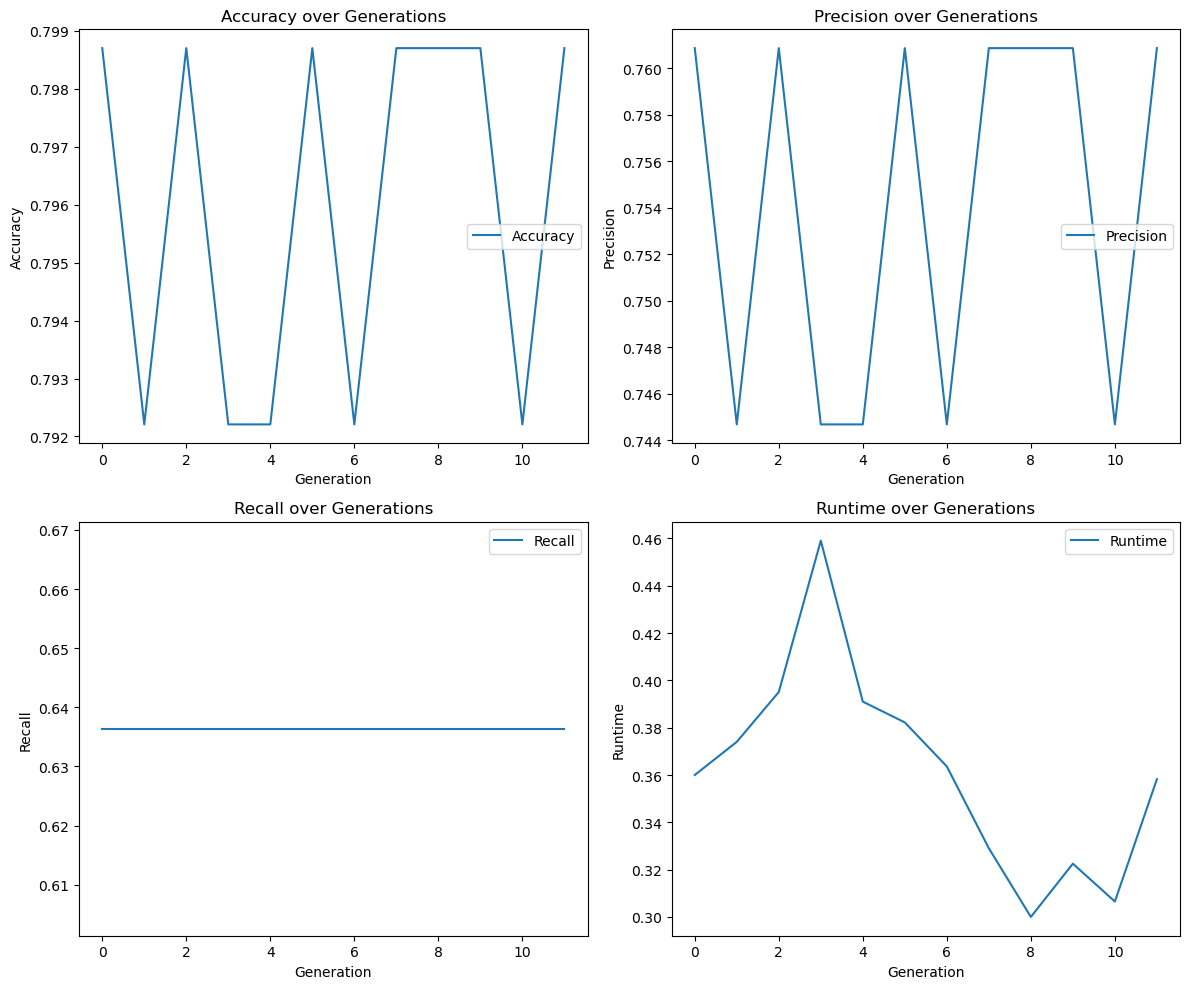

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.8

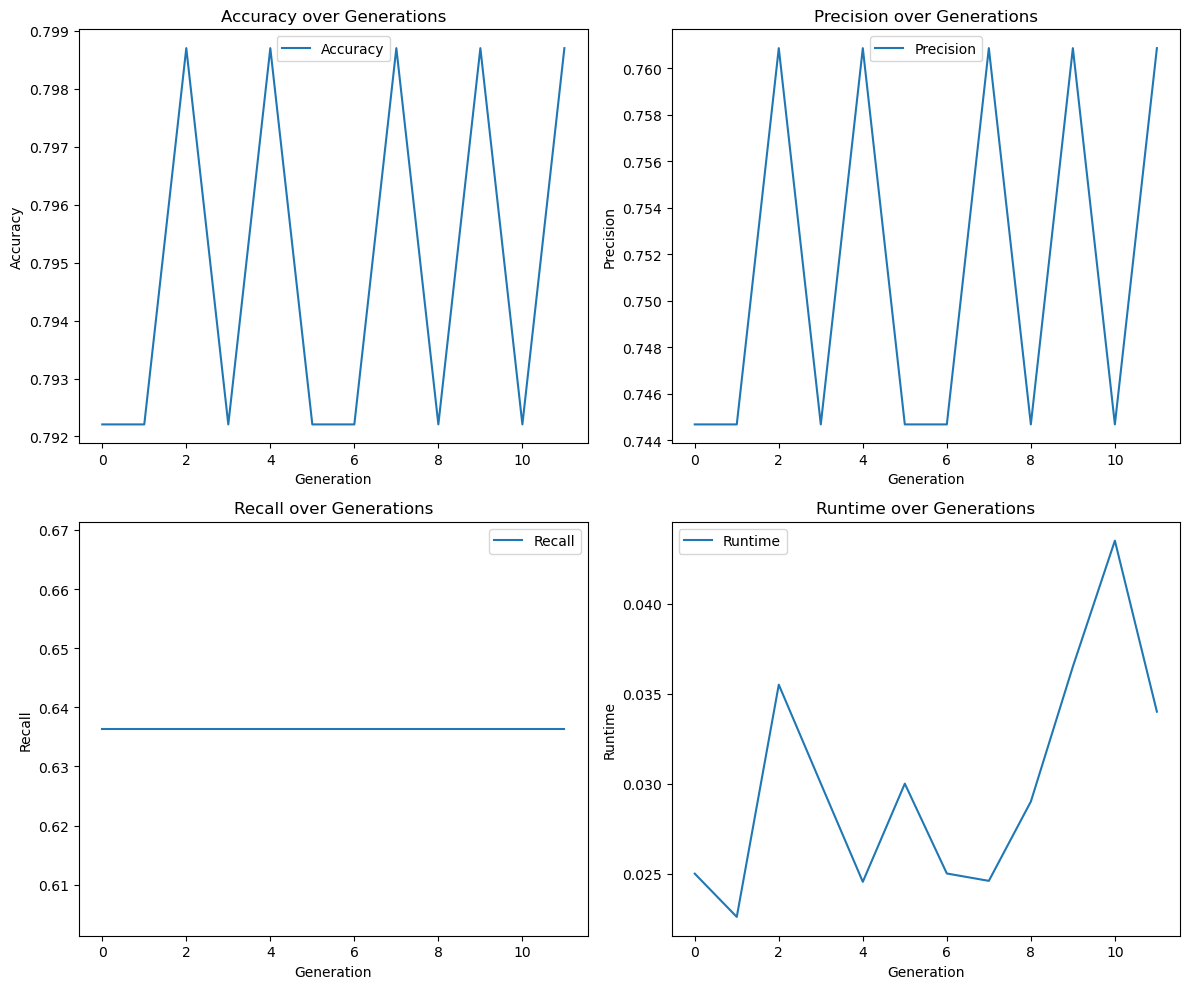


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.8
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 4.34 seconds
Total Memory Usage: 2625.75 MB

With Transfer Learning:
Total Runtime: 0.36 seconds
Total Memory Usage: 2687.5 MB

Run number:  2
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77

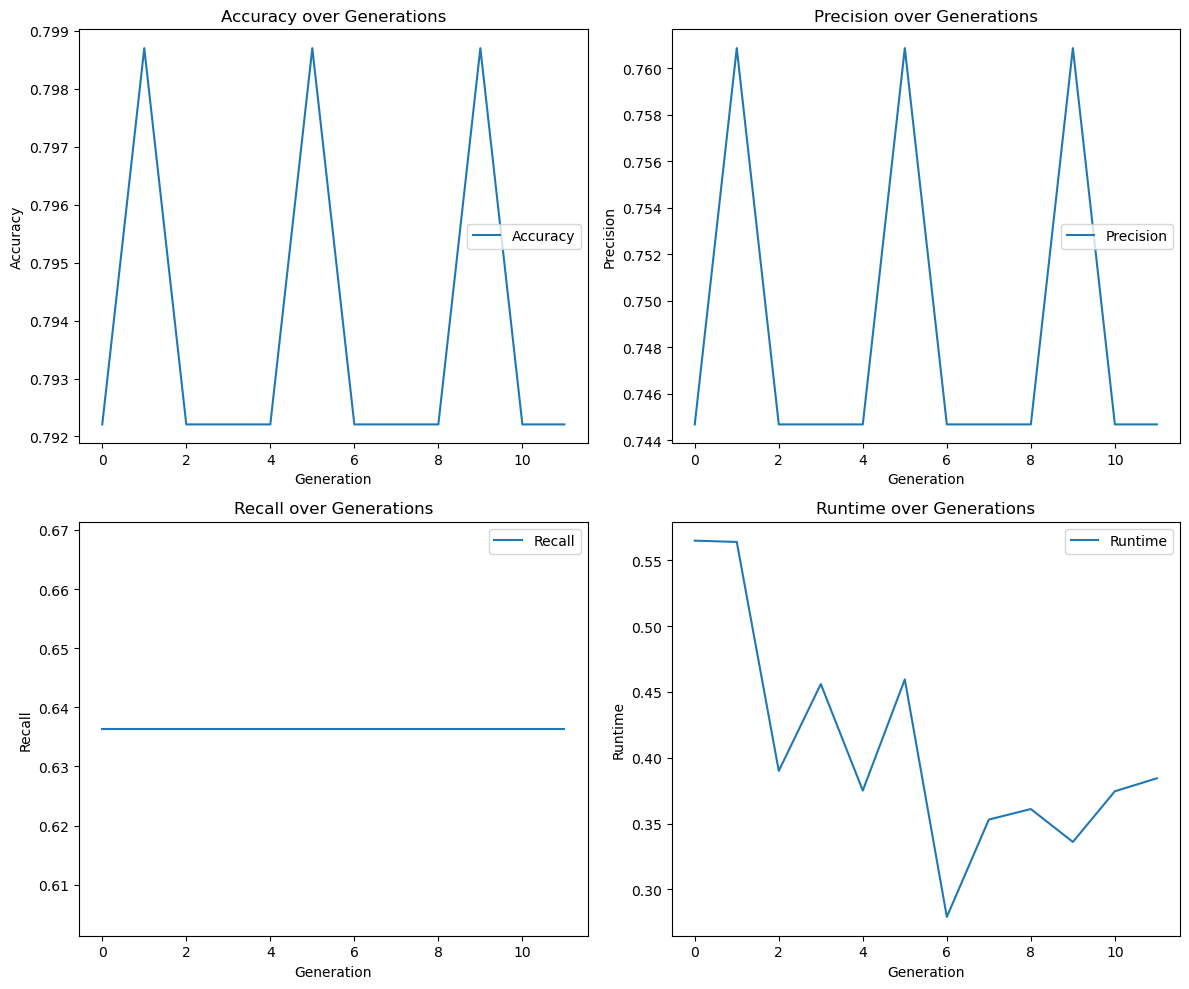

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.8

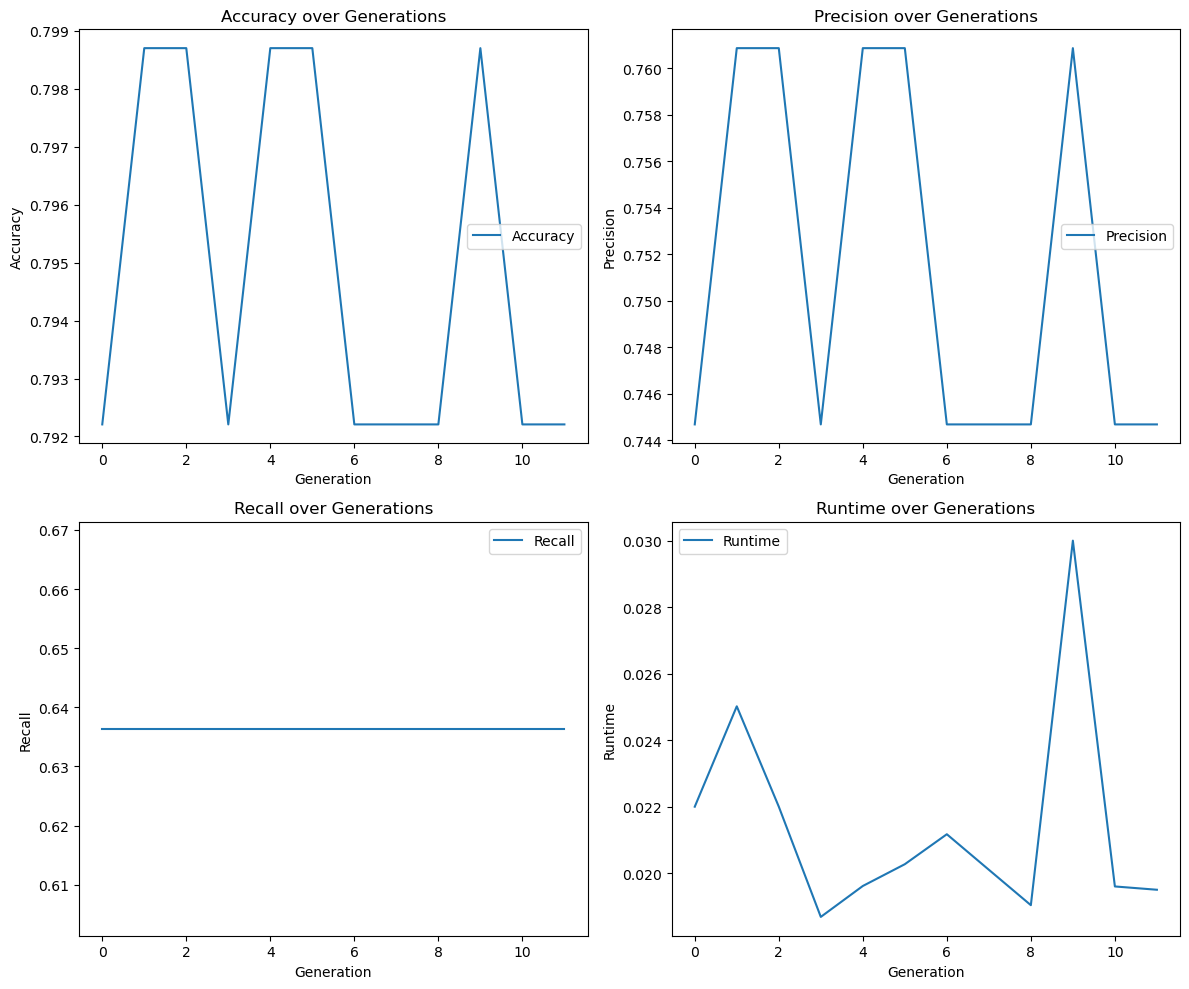


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 4.9 seconds
Total Memory Usage: 2769.91 MB

With Transfer Learning:
Total Runtime: 0.26 seconds
Total Memory Usage: 2857.08 MB

Run number:  3
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.7

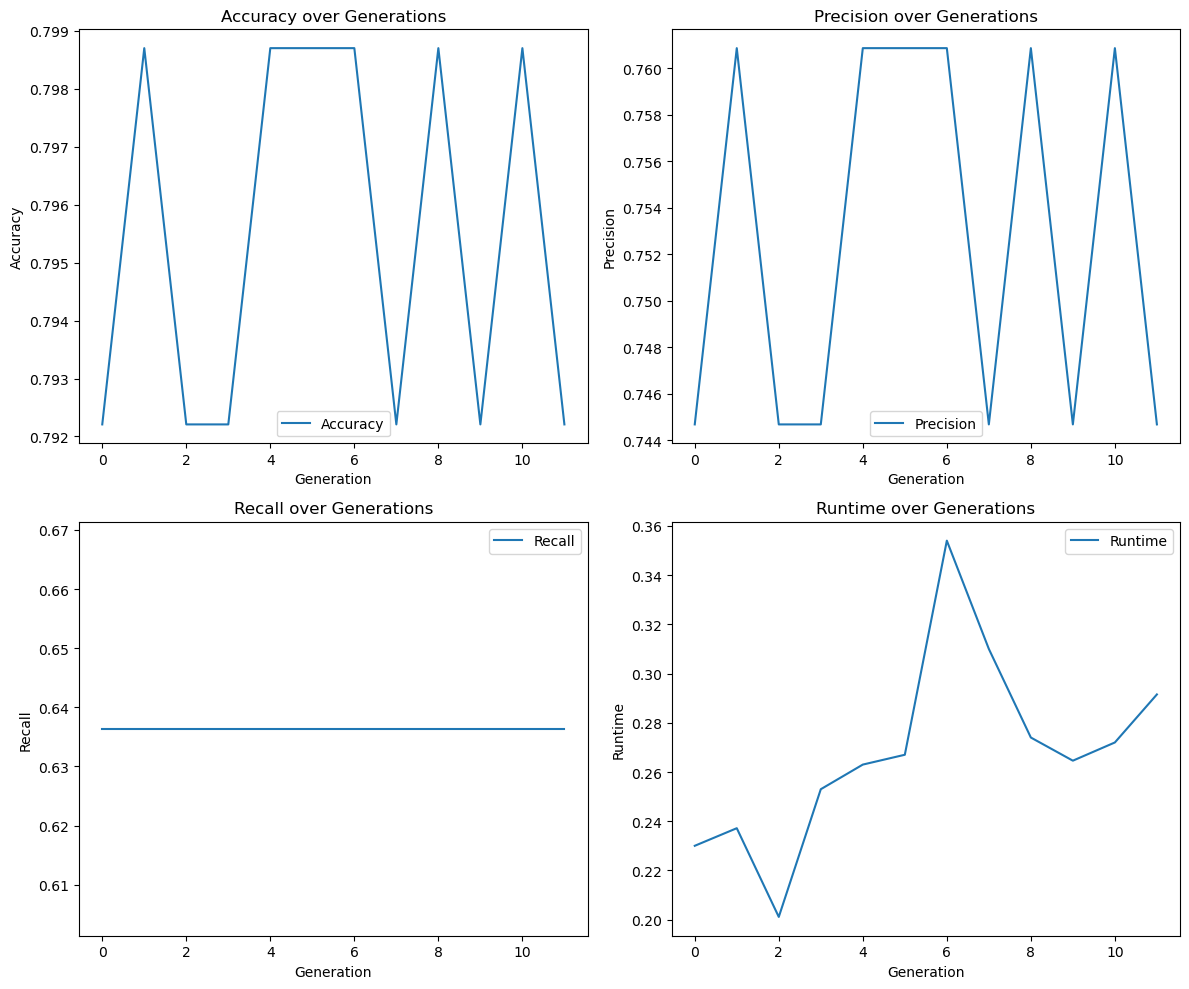

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.7

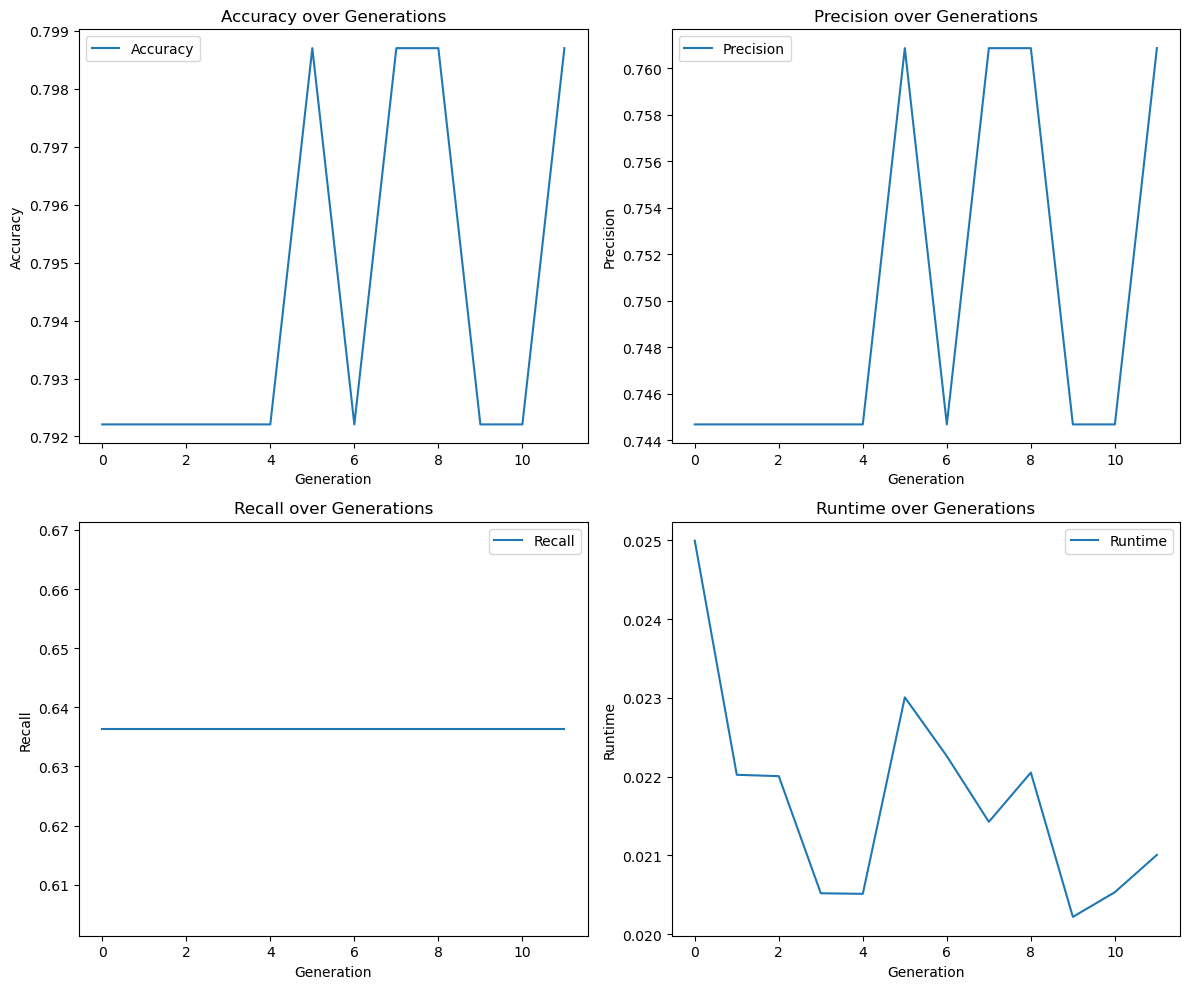


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.8
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 3.22 seconds
Total Memory Usage: 2949.2 MB

With Transfer Learning:
Total Runtime: 0.26 seconds
Total Memory Usage: 2686.64 MB

Run number:  4
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77

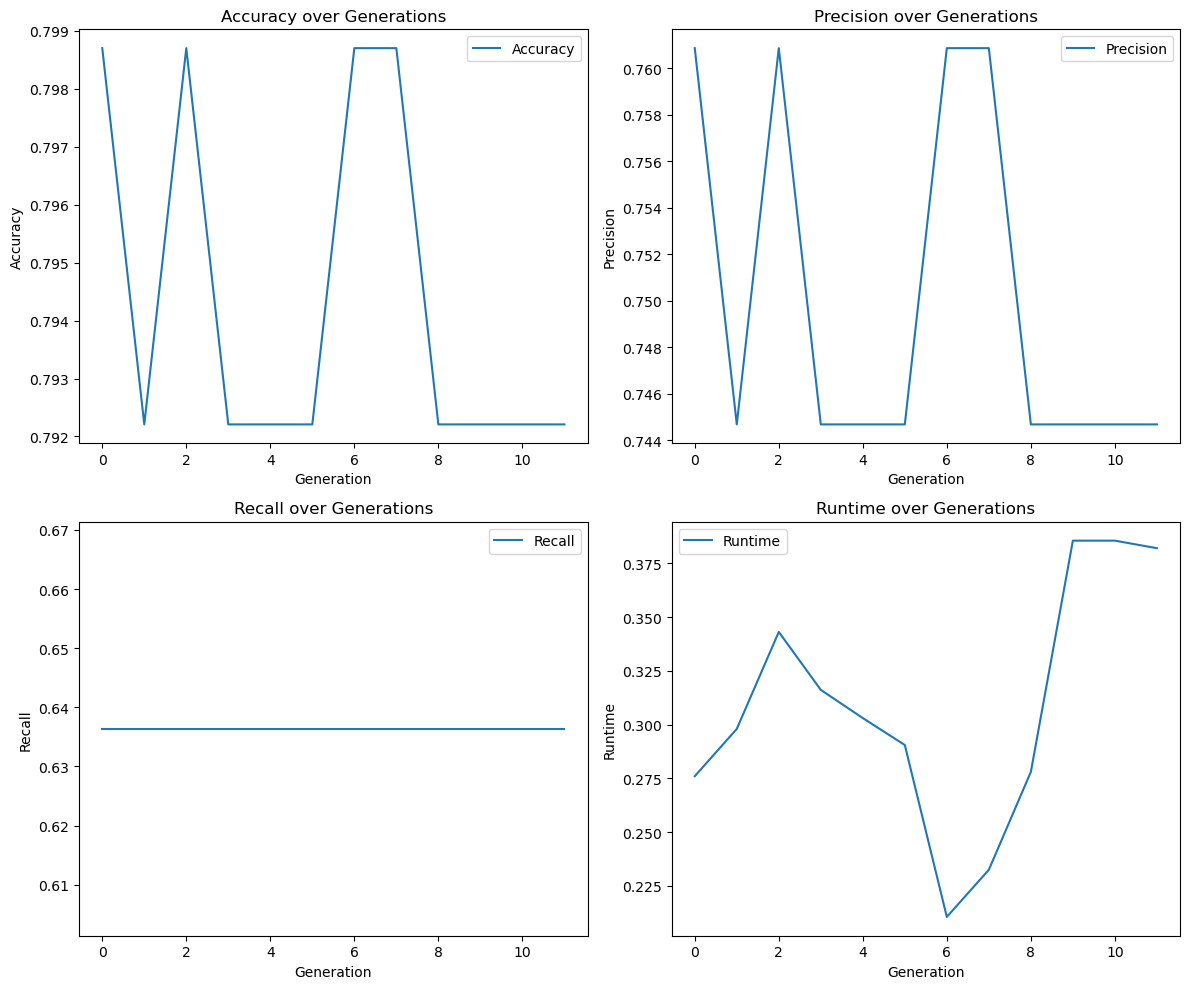

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.7

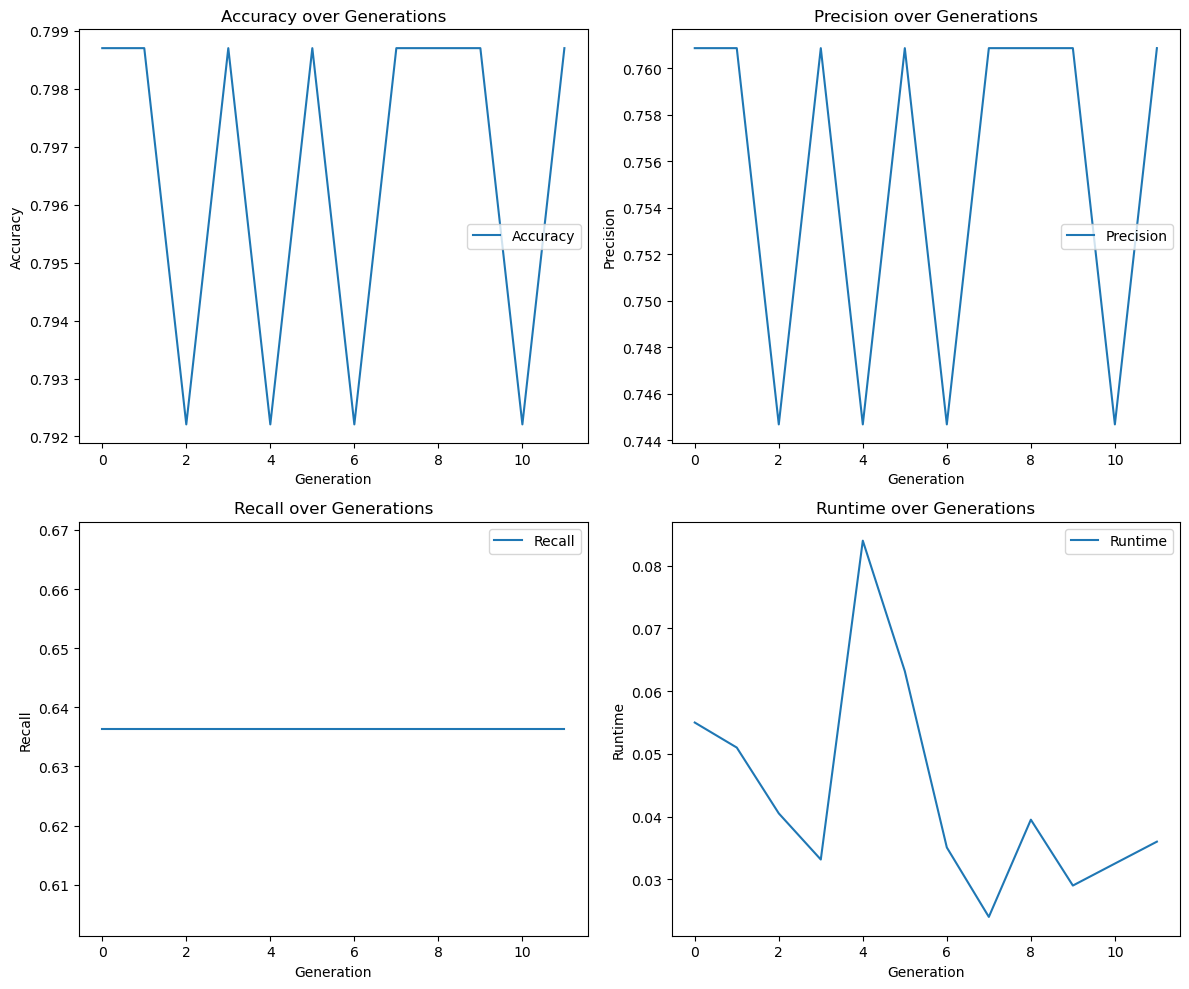


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.8
Overall Precision: 0.76

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 3.7 seconds
Total Memory Usage: 2745.8 MB

With Transfer Learning:
Total Runtime: 0.52 seconds
Total Memory Usage: 2814.38 MB

Run number:  5
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77 

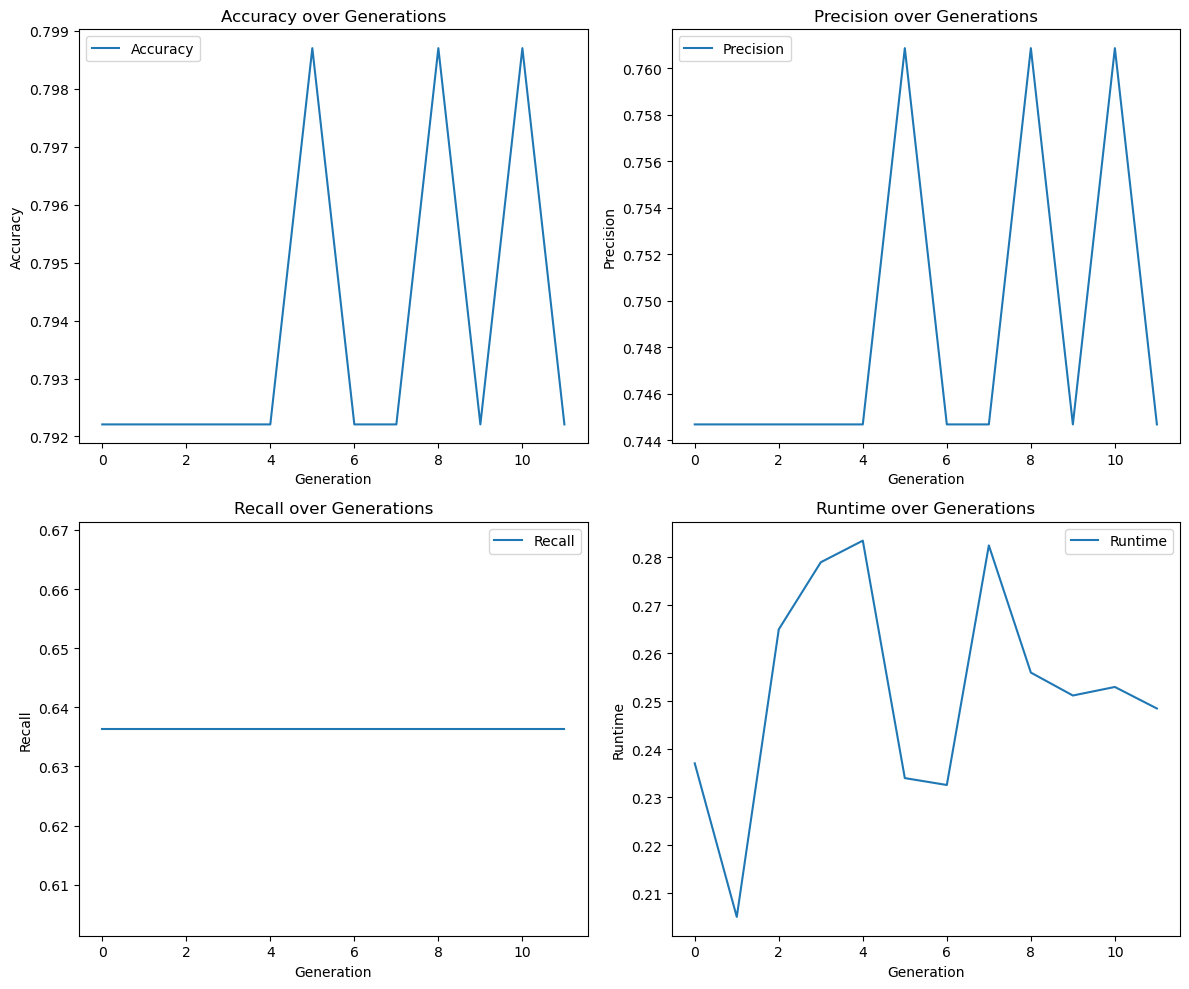

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.8

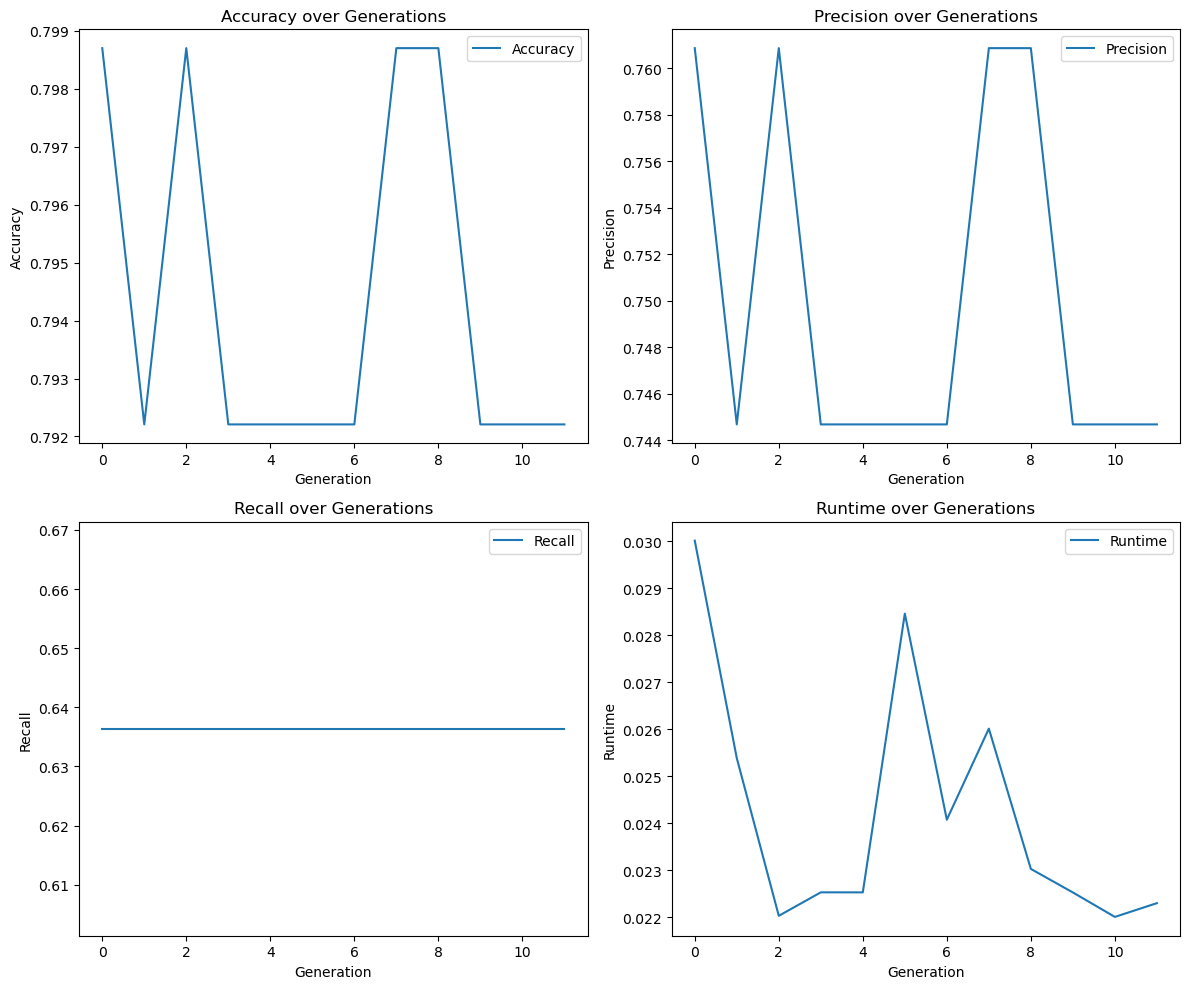


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 3.03 seconds
Total Memory Usage: 2772.0 MB

With Transfer Learning:
Total Runtime: 0.29 seconds
Total Memory Usage: 2839.69 MB

Run number:  6
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.7

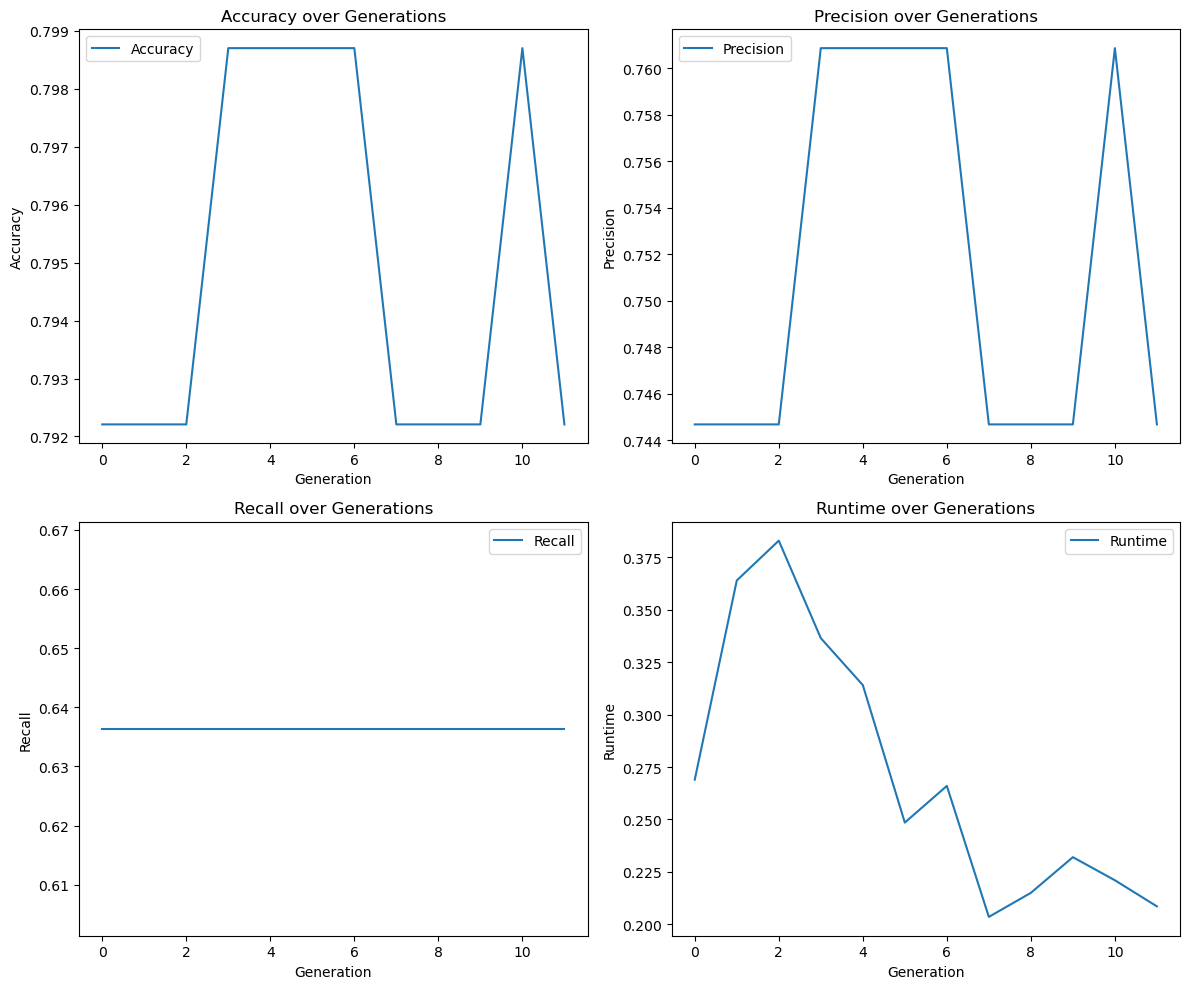

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.8

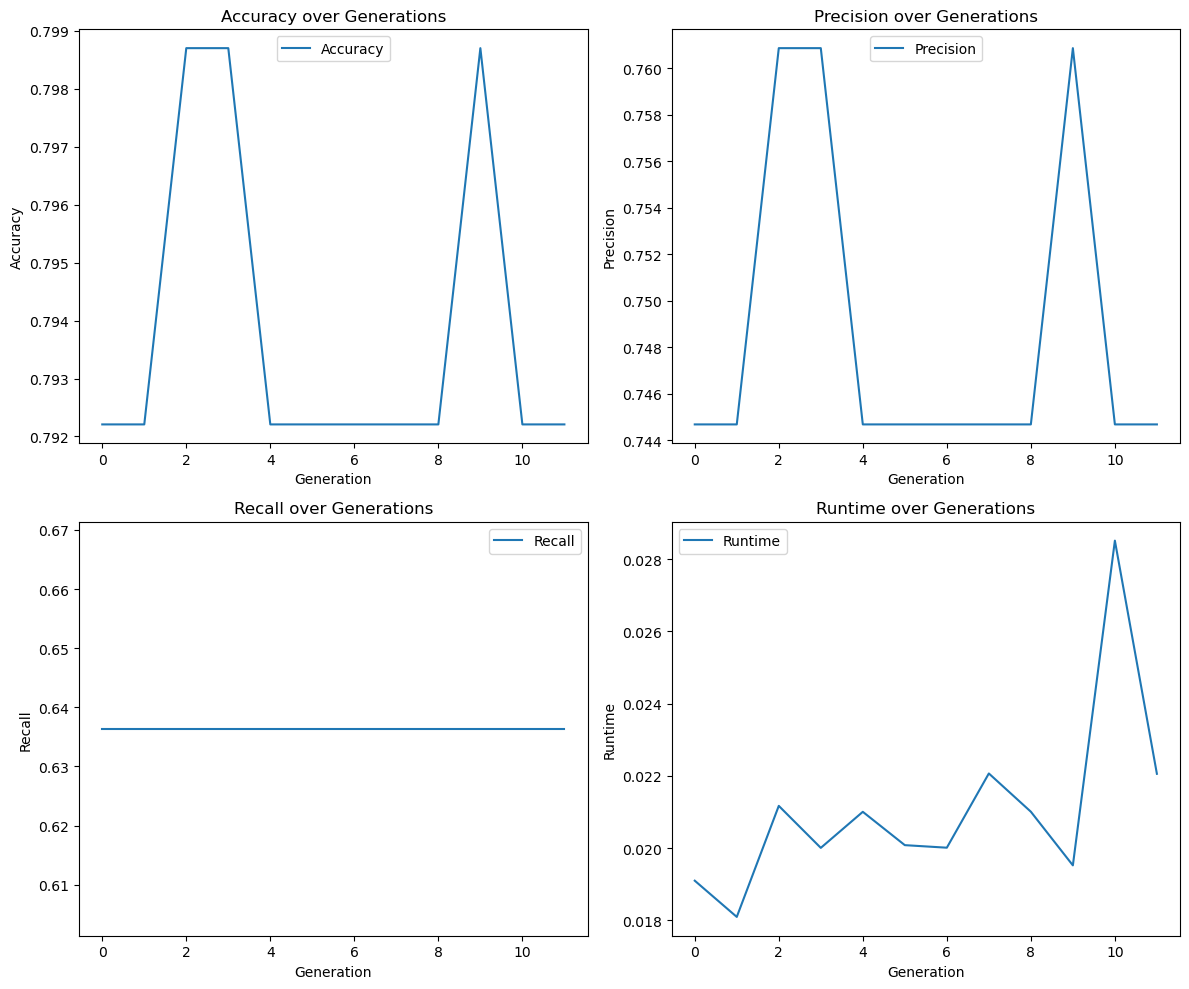


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 3.26 seconds
Total Memory Usage: 2578.73 MB

With Transfer Learning:
Total Runtime: 0.25 seconds
Total Memory Usage: 2635.61 MB

Run number:  7
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.

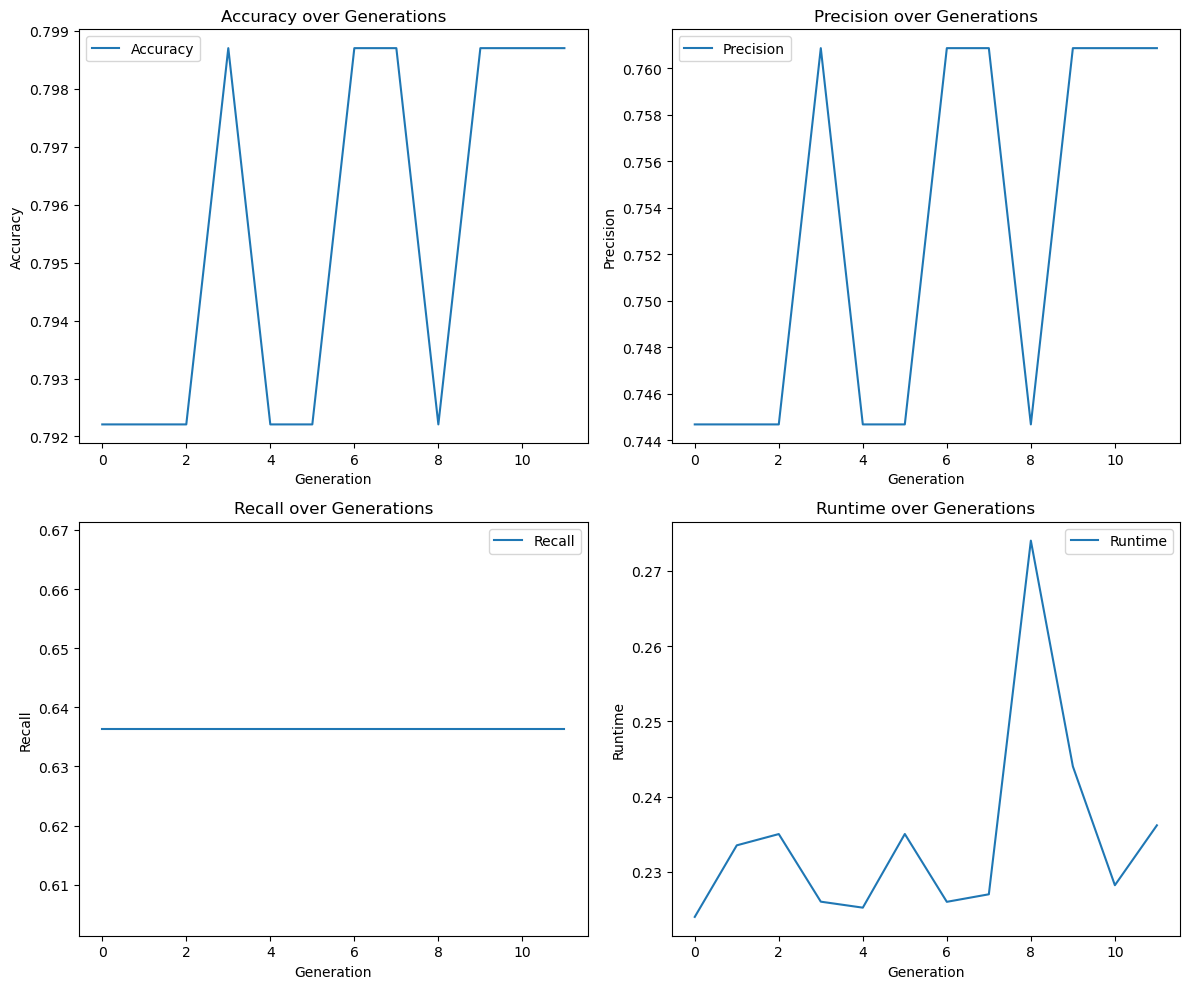

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.7

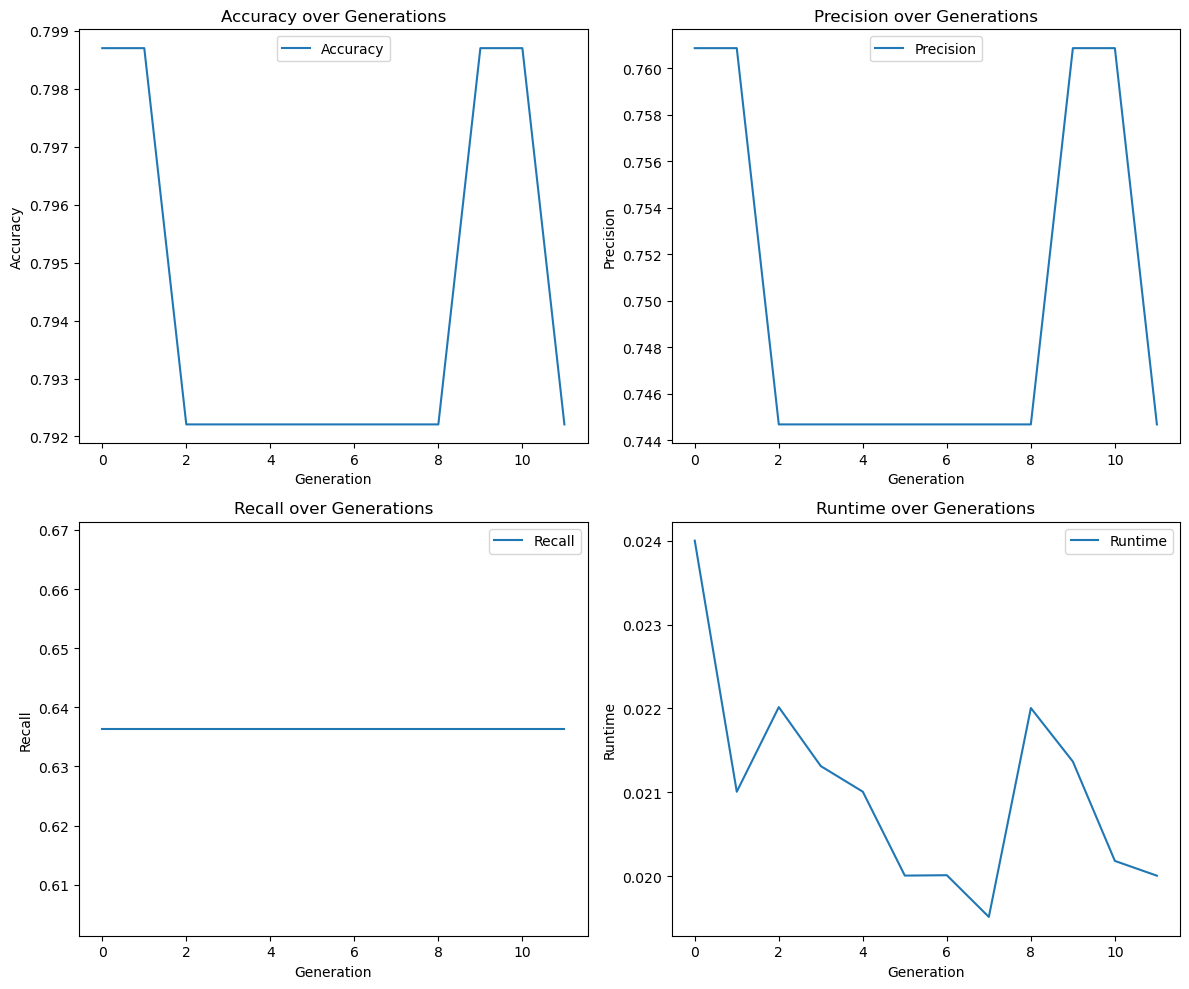


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.8
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 2.81 seconds
Total Memory Usage: 2701.27 MB

With Transfer Learning:
Total Runtime: 0.25 seconds
Total Memory Usage: 2765.95 MB

Run number:  8
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.7

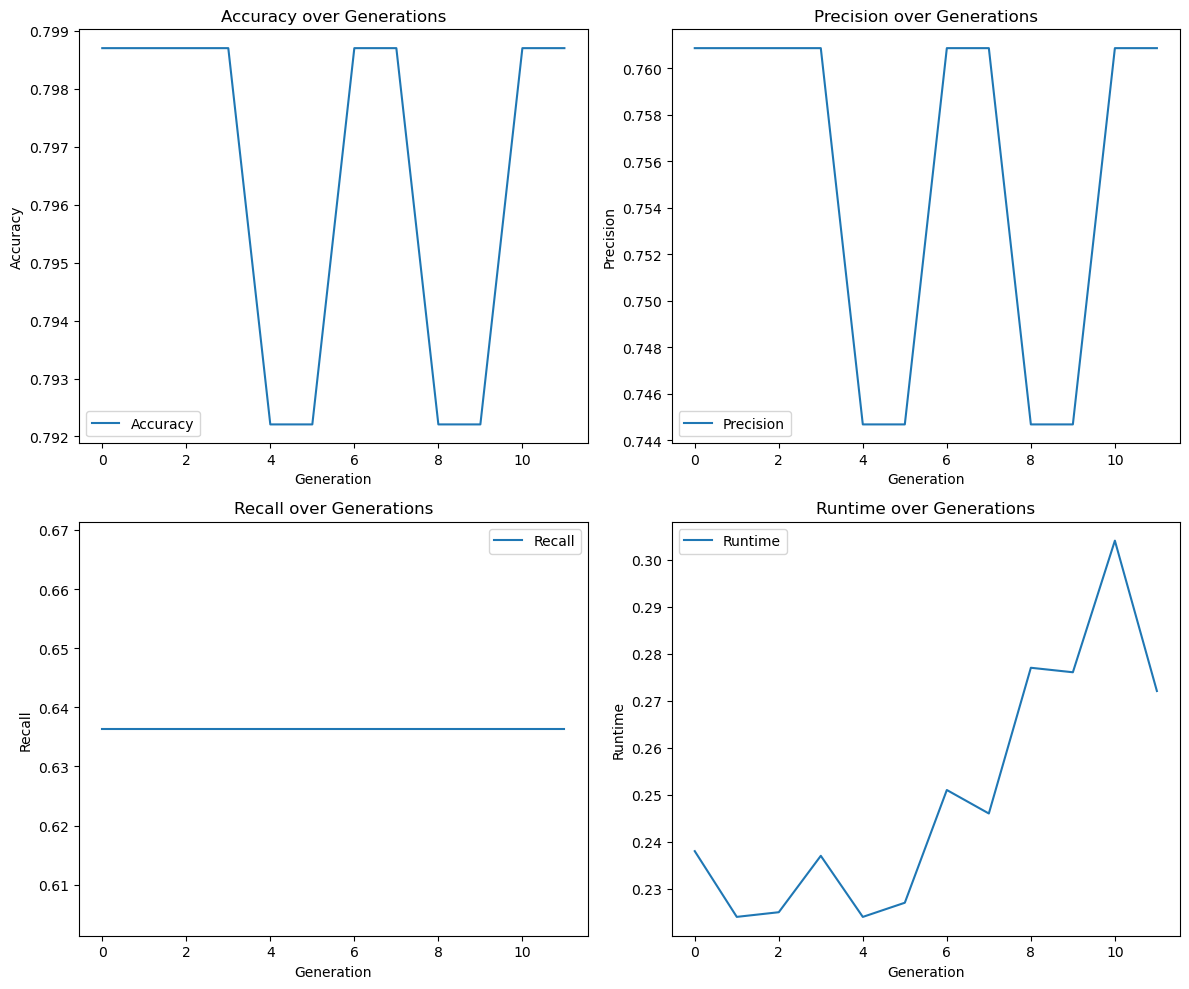

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.8

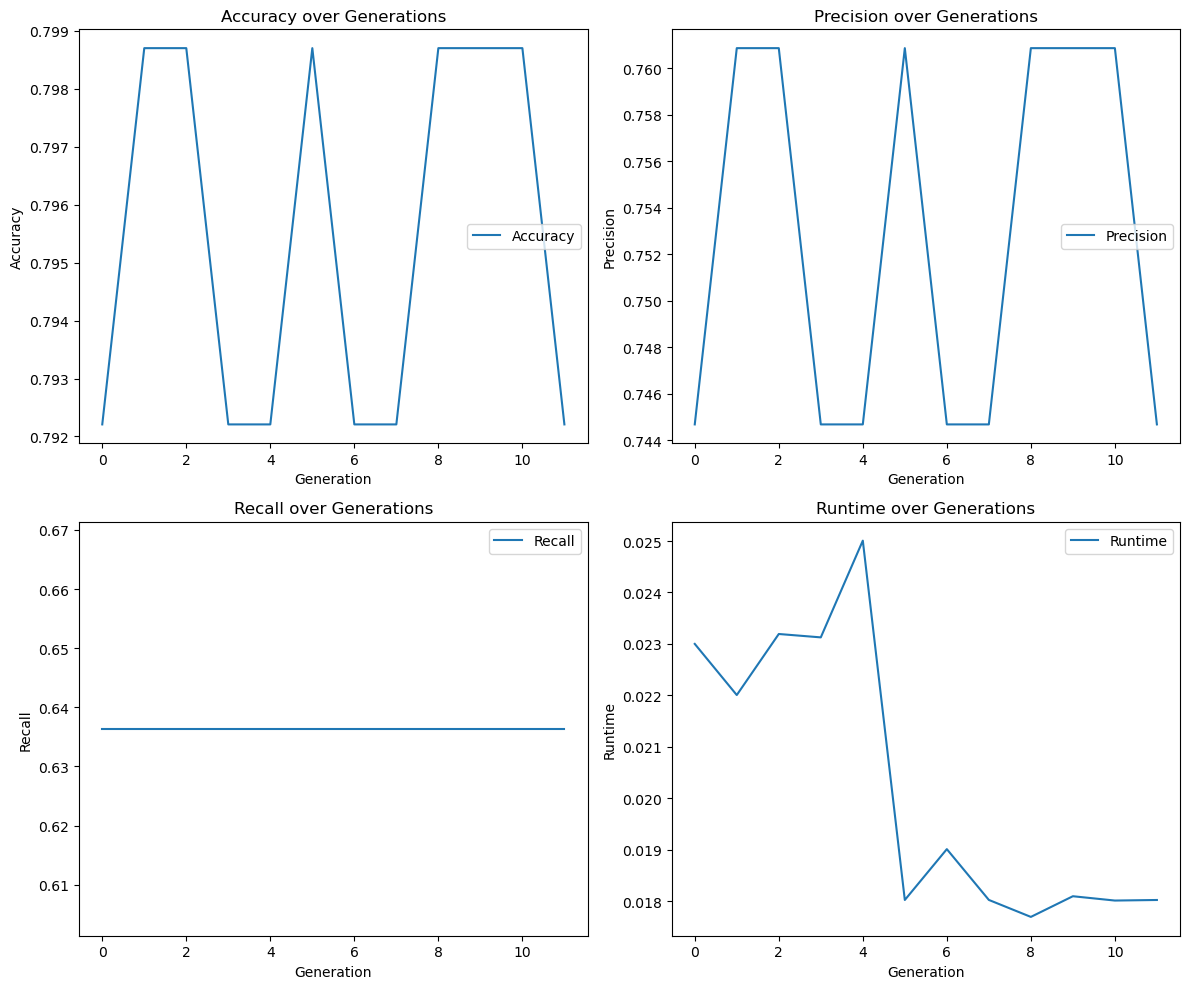


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.8
Overall Precision: 0.76

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.8
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 3.0 seconds
Total Memory Usage: 2832.38 MB

With Transfer Learning:
Total Runtime: 0.24 seconds
Total Memory Usage: 2619.7 MB

Run number:  9
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77  

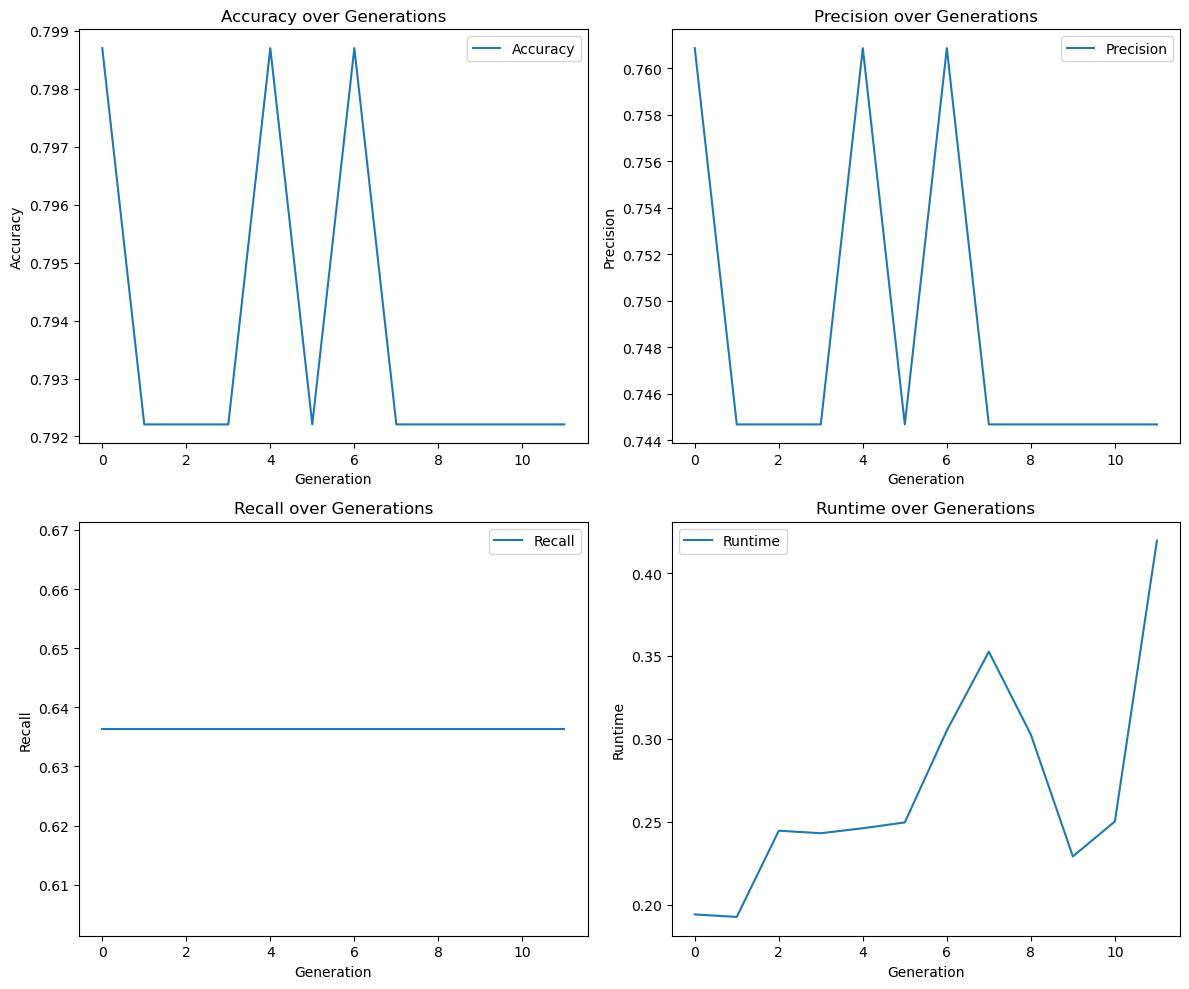

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.8

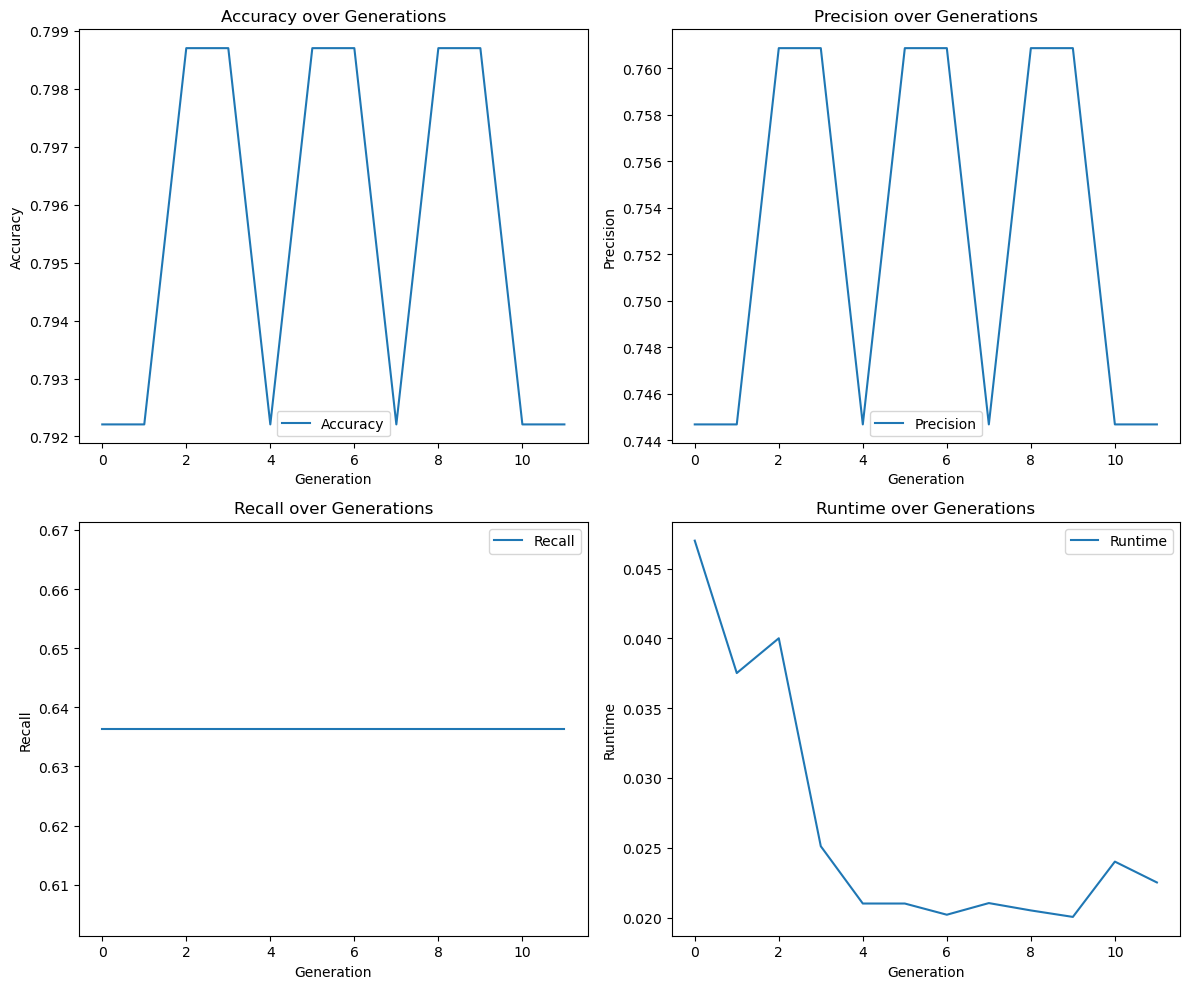


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.8
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 3.23 seconds
Total Memory Usage: 2673.66 MB

With Transfer Learning:
Total Runtime: 0.32 seconds
Total Memory Usage: 2729.16 MB

Run number:  10
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.

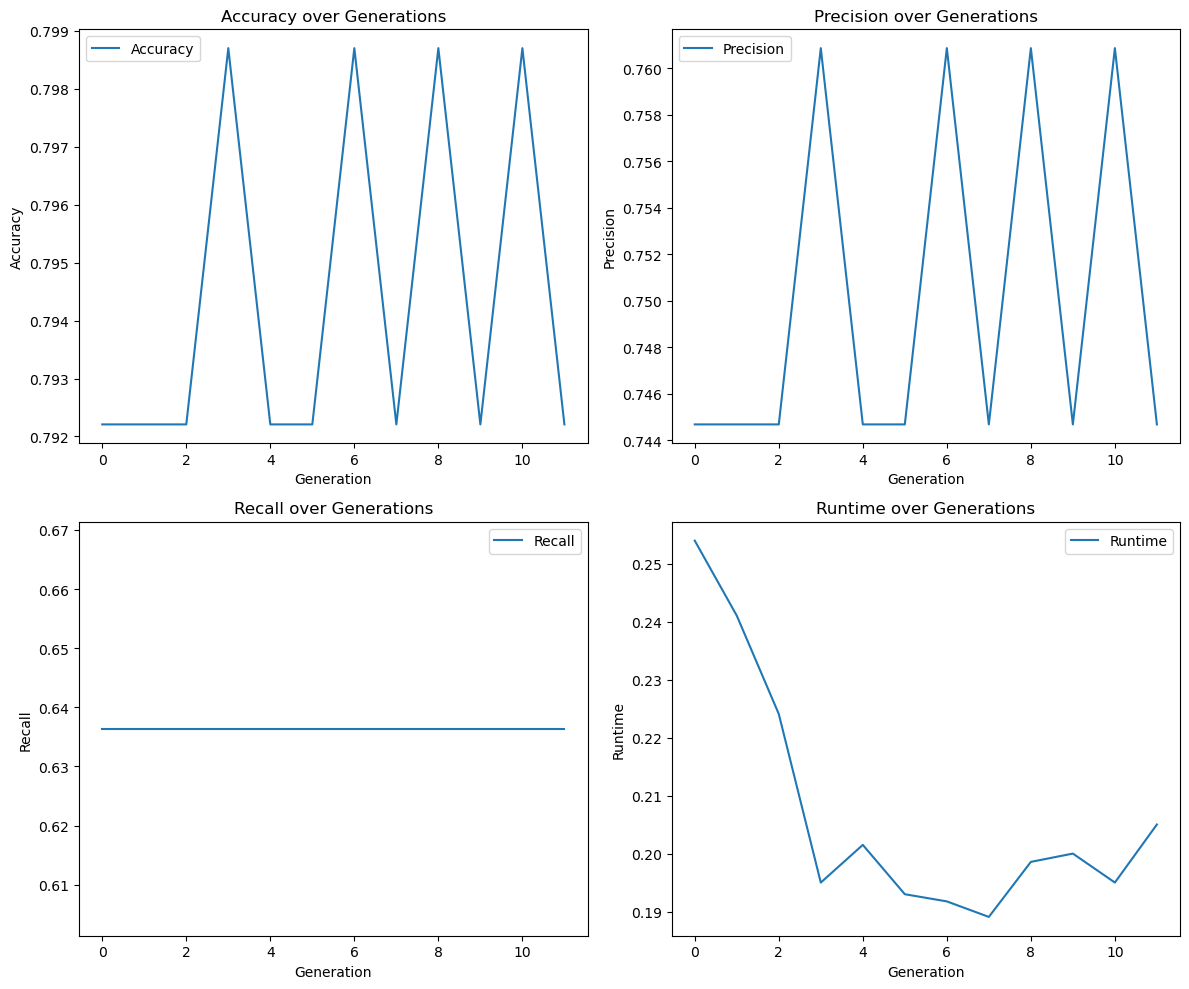

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.7

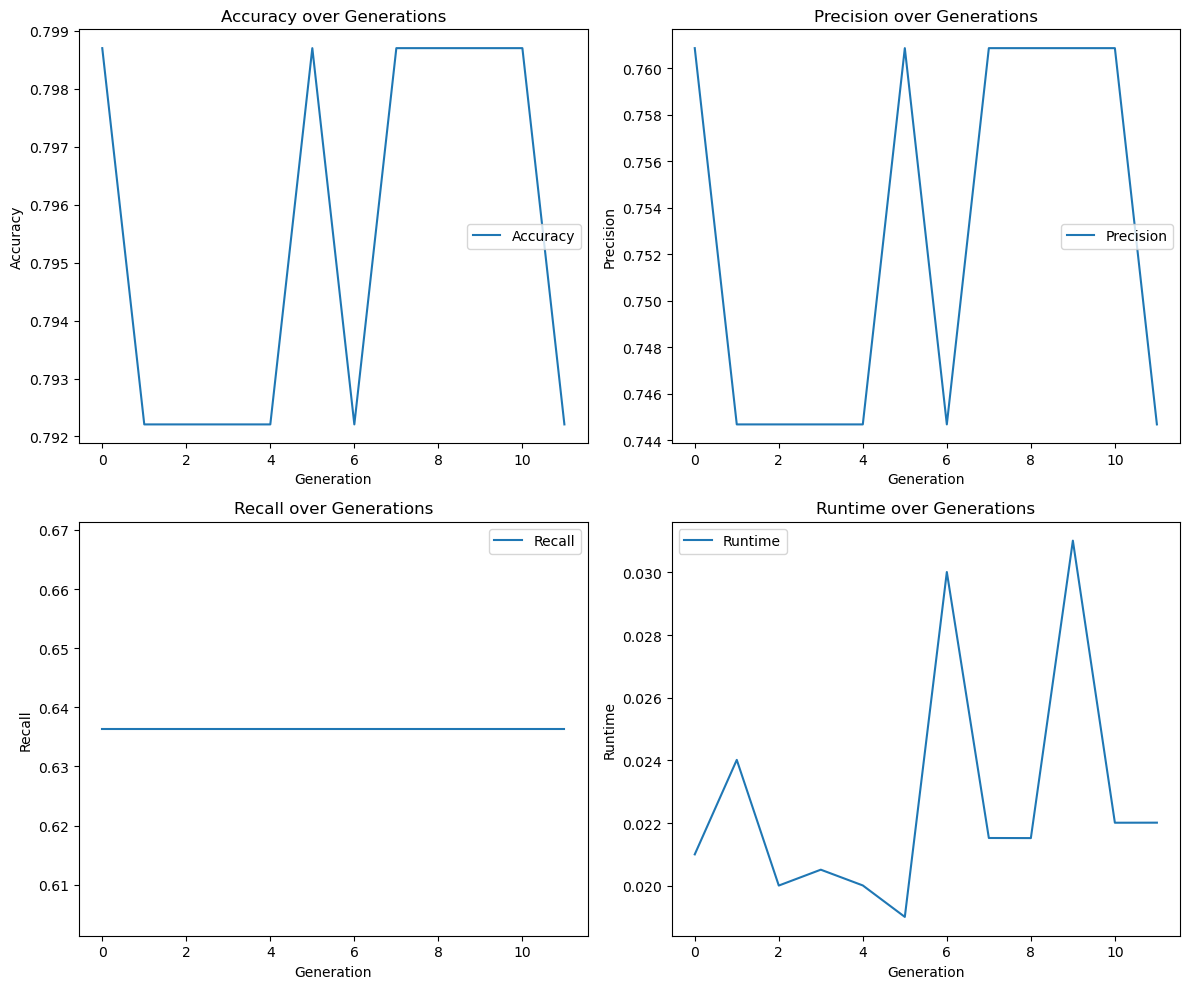


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.8
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 2.49 seconds
Total Memory Usage: 2783.86 MB

With Transfer Learning:
Total Runtime: 0.27 seconds
Total Memory Usage: 2787.93 MB

Run number:  11
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.

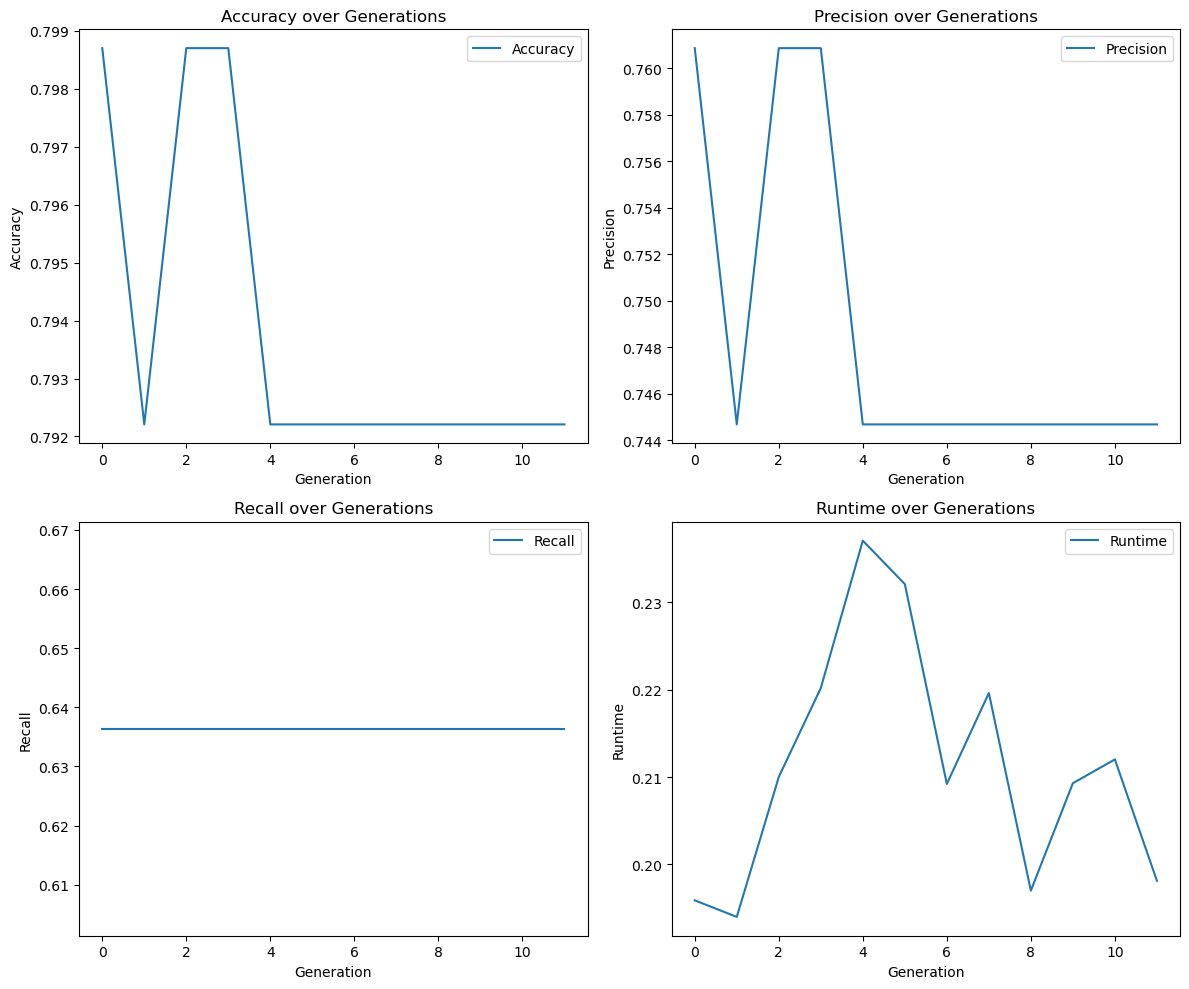

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.8

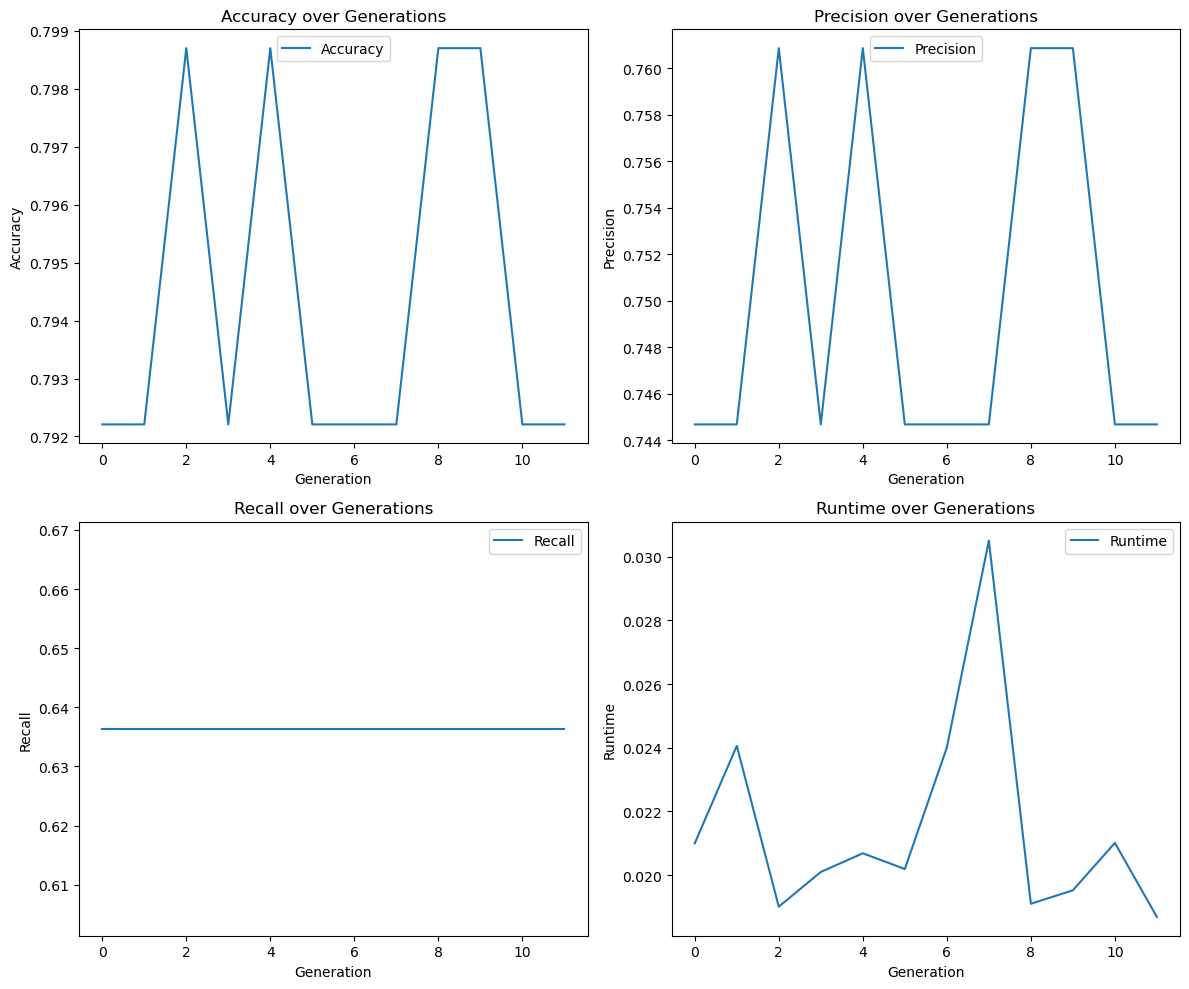


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 2.53 seconds
Total Memory Usage: 2815.82 MB

With Transfer Learning:
Total Runtime: 0.26 seconds
Total Memory Usage: 2505.94 MB

Run number:  12
Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0

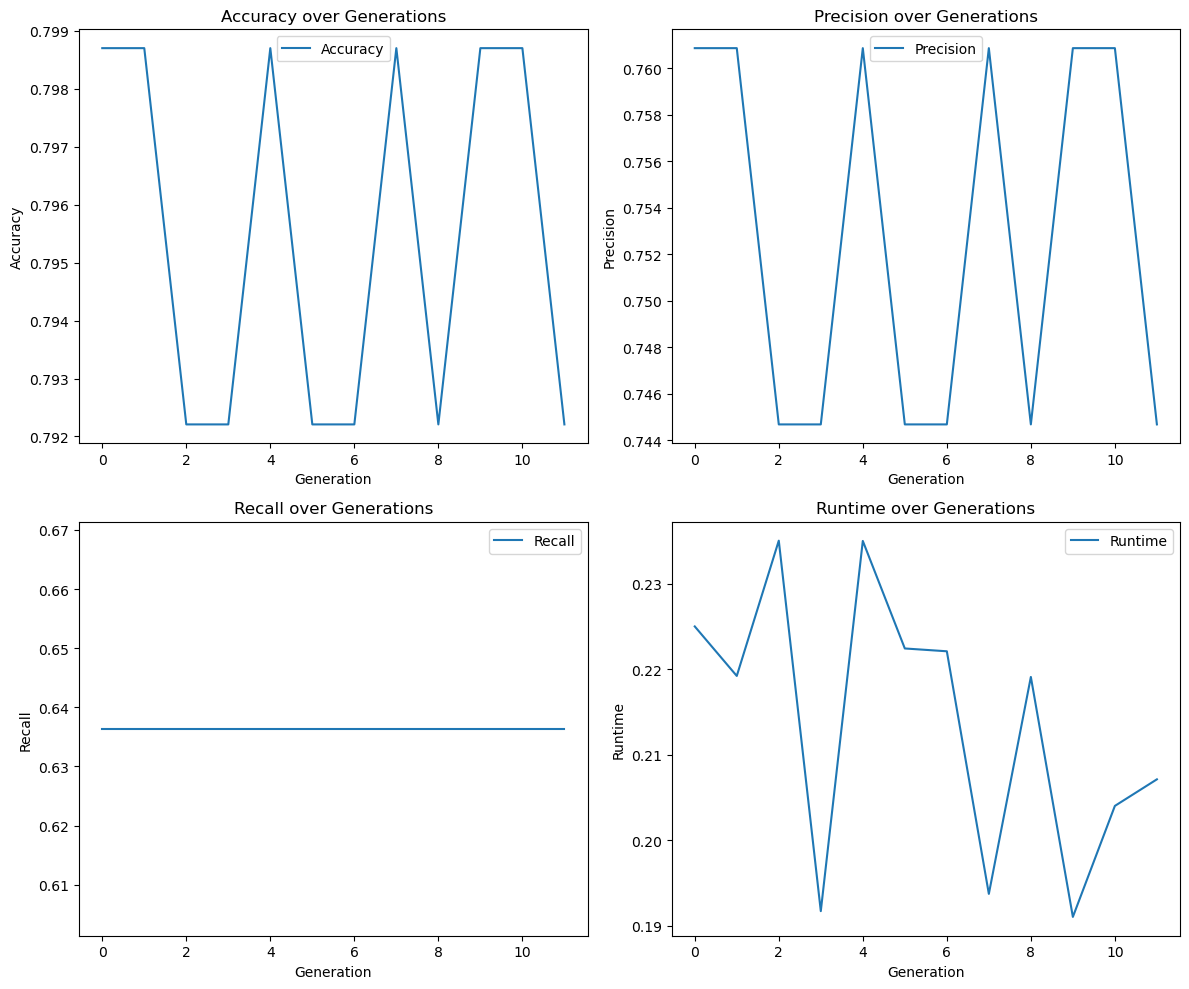

Generation 0:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Generation 1:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Generation 2:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.7

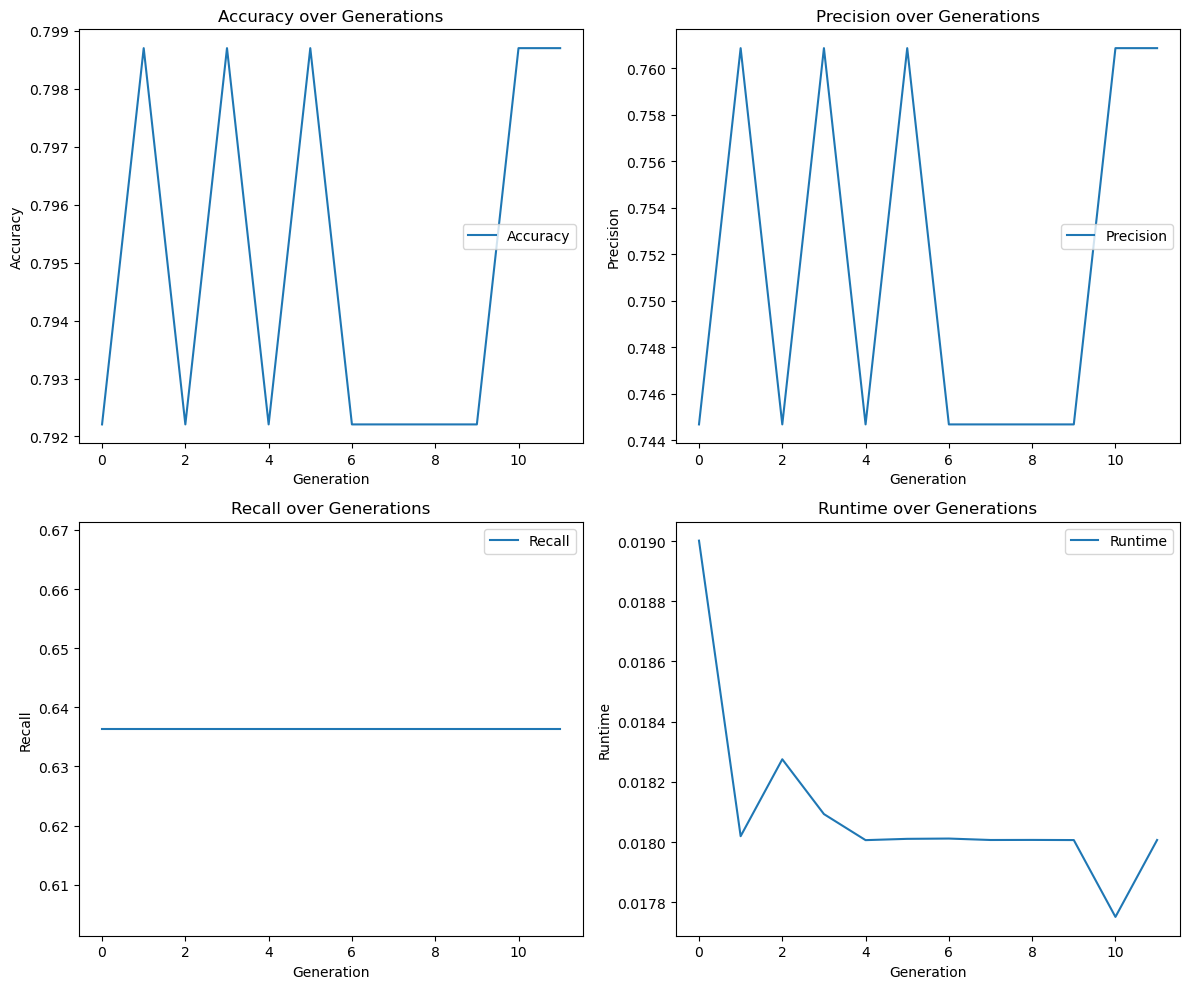


Overall Metrics Without Transfer Learning:
Overall Accuracy: 0.8
Overall Precision: 0.75

Overall Metrics With Transfer Learning:
Overall Accuracy: 0.79
Overall Precision: 0.75

Runtime and Memory:
Without Transfer Learning:
Total Runtime: 2.57 seconds
Total Memory Usage: 2564.16 MB

With Transfer Learning:
Total Runtime: 0.22 seconds
Total Memory Usage: 2628.09 MB


End of the program Results:
Total accuracy for 12 runs is: 0.79 % for without transfer
Total Precision for 12 runs is: 0.75 % for without transfer
Total accuracy for 12 runs is: 0.79 % for with transfer
Total Precision for 12 runs is: 0.75 % for with transfer



Total Runtime for 12 runs is: 39.08 seconds for without transfer
Total Memory Usage for 12 runs is: 32812.52 MB for without transfer
Total Runtime for 12 runs is: 3.51 seconds for with transfer
Total Memory Usage for 12 runs is: 32557.66 MB for with transfer


In [26]:
# Main function
if __name__ == "__main__":
    source_file_path = "diabetes.csv"
    target_file_path = "diabetes.csv"
    source_X, source_y = read_data(source_file_path)
    target_X, target_y = read_data(target_file_path)
    
    max_depth = 5
    population_size = 20
    tournament_size = 3
    mutation_rate = 0.2
    generations = 12
    crossover_rate = 0.8
    
    
    
    accuracy_without = 0
    accuracy_with = 0
    Precision_without = 0
    precision_with = 0
    
    timer_without = 0
    timer_with = 0
    memory_without = 0
    memory_with = 0
    
    runs = 0
    
    # run 10 times
    for i in range(12):
        
        runs = i + 1
        
        print('\nRun number: ', i+1)
        # Without transfer learning
        X_train, X_test, y_train, y_test = train_test_split(target_X, target_y, test_size=0.2, random_state=42)
        best_tree_without_transfer_learning, metrics_without_transfer, runtime_without_transfer, memory_without_transfer = genetic_programming_without_transfer_learning(X_train, y_train, X_test, y_test, max_depth, population_size, tournament_size, mutation_rate, generations, crossover_rate)

        # With transfer learning
        target_X_train, target_X_test, target_y_train, target_y_test = train_test_split(target_X, target_y, test_size=0.2, random_state=42)
        best_tree_with_transfer_learning, metrics_with_transfer, runtime_with_transfer, memory_with_transfer = genetic_programming_with_transfer_learning(source_X, source_y, target_X_train, target_y_train, target_X_test, target_y_test, max_depth, population_size, tournament_size, mutation_rate, generations, crossover_rate)

        # Calculate overall metrics for with and without transfer learning
        overall_accuracy_without_transfer = np.mean(metrics_without_transfer['accuracy'])
        overall_precision_without_transfer = np.mean(metrics_without_transfer['precision'])
        overall_accuracy_with_transfer = np.mean(metrics_with_transfer['accuracy'])
        overall_precision_with_transfer = np.mean(metrics_with_transfer['precision'])

        print("\nOverall Metrics Without Transfer Learning:")
        print(f"Overall Accuracy: {round(overall_accuracy_without_transfer, 2)}")
        print(f"Overall Precision: {round(overall_precision_without_transfer, 2)}")
        accuracy_without = accuracy_without + overall_accuracy_without_transfer
        Precision_without = Precision_without + overall_precision_without_transfer

        print("\nOverall Metrics With Transfer Learning:")
        print(f"Overall Accuracy: {round(overall_accuracy_with_transfer, 2)}")
        print(f"Overall Precision: {round(overall_precision_with_transfer, 2)}")
        accuracy_with = accuracy_with + overall_accuracy_with_transfer
        precision_with = precision_with + overall_precision_with_transfer

        # Print runtime and memory for both scenarios
        print("\nRuntime and Memory:")
        
        print("Without Transfer Learning:")
        print(f"Total Runtime: {round(runtime_without_transfer, 2)} seconds")
        print(f"Total Memory Usage: {round(memory_without_transfer, 2)} MB")
        timer_without = timer_without + runtime_without_transfer
        memory_without = memory_without + memory_without_transfer
        
        print("\nWith Transfer Learning:")
        print(f"Total Runtime: {round(runtime_with_transfer, 2)} seconds")
        print(f"Total Memory Usage: {round(memory_with_transfer, 2)} MB")
        timer_with = timer_with + runtime_with_transfer
        memory_with = memory_with + memory_with_transfer
        
    
    print("\n\nEnd of the program Results:")
    print(f"Total accuracy for {runs} runs is: {round(accuracy_without/runs, 2)} % for without transfer")
    print(f"Total Precision for {runs} runs is: {round(Precision_without/runs, 2)} % for without transfer")
    print(f"Total accuracy for {runs} runs is: {round(accuracy_with/runs, 2)} % for with transfer")
    print(f"Total Precision for {runs} runs is: {round(precision_with/runs, 2)} % for with transfer")
    
    print('\n\n')
    print(f"Total Runtime for {runs} runs is: {round(timer_without,2)} seconds for without transfer")
    print(f"Total Memory Usage for {runs} runs is: {round(memory_without, 2)} MB for without transfer")
    print(f"Total Runtime for {runs} runs is: {round(timer_with, 2)} seconds for with transfer")
    print(f"Total Memory Usage for {runs} runs is: {round(memory_with, 2)} MB for with transfer")
        